In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import pickle
import os
import json
import datetime
import contractions
import pickle
import mysql.connector
from mysql.connector import Error
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif, RFE
import statsmodels.api as sm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score,f1_score
from sklearn.metrics import auc, average_precision_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from string import punctuation
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white")
plt.rcParams['figure.figsize'] = (18, 5)
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', UserWarning)
import sys
# Path to the module (ModelInference) and config
sys.path.append('/home/daniel/Desktop/programming/pythondatascience/datascience/NLP/sentiment-hate-system/src')
from pipeline.modelinference import ModelInference
from config import config

/home/daniel/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/daniel/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
class ToPandasDF():
    def __init__(self, password, host, database, user):

        self.password = password
        self.host = host
        self.database = database
        self.user = user
        
    
    def MySQLconnect(self, query):
        
        try:
            connection = mysql.connector.connect(host=self.host, 
                                                 database=self.database, 
                                                 password=self.password,
                                                 user=self.user)

            if connection.is_connected():

                print("Successfully connected to the database\n")

                cursor = connection.cursor()
                query = query
                cursor.execute(query)

                data = cursor.fetchall()

                df = pd.DataFrame(data, columns = ['id', 'date', 'tweet'])
        except Error as e:
            print(e)
            
        cursor.close()
        connection.close()
        
        return df
    
    def check_if_valid_data(self, data):
        
        # Create a timestamp of the date(Day, Month & Year)
        data['timestamp'] = data['date'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))
        
        if data.empty:
            print("No tweets downloaded. Finishing execution")
            
        if data['id'].unique().all():
            pass
        else:
            print(f"Primary Key check is violated, Number of duplicate values: {data.duplicated().sum()}")
            
        if data.isnull().values.any():
            print(f"\nNull values detected, Number of null: \n{data.isnull().sum()}")
        
        yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
        yesterday = yesterday.replace(hour=0, minute=0, second=0, microsecond=0)
        timestamps = data['timestamp'].tolist()
        for timestamp in timestamps:
            if datetime.datetime.strptime(timestamp, '%Y-%m-%d') != yesterday:
                print("Atleast one of the returned tweet does not come from within the last 24 hours")
    
    def pseudo_labelling(self, data):
        
        mi = ModelInference()
        # We made the usernames anonymous in the tweet column
        data['tweet'] = data.tweet.replace(regex=re.compile(r"@([A-Za-z0-9_]+)"), value='@user')
        # Script to label new data
        data = data.copy()
        data = data.drop(['date','timestamp'], axis=1)
        data = data.rename(columns={'tweet':'text'})
        if (data is not None):
            # Parse the data through the predicted_output_category & predicted_probability, 
            # which scales and makes predictions
            preds = mi.predicted_output_category(data)
            data['label'] = preds
            data = data[['id', 'text', 'label']]
            print(data.shape)
            
            return data
        


if __name__ == '__main__':
    
    t = ToPandasDF(config.PASSWORD, config.HOST, config.DATABASE, config.USER)
    orig_data = t.MySQLconnect("SELECT id, created_at, tweet FROM `twitterdb`.`twitter_table`;")
    t.check_if_valid_data(orig_data)
    data = t.pseudo_labelling(orig_data)

Successfully connected to the database

Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the retur

Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the 

Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the last 24 hours
Atleast one of the returned tweet does not come from within the 

(3799, 3)


# Exploratory Data Analysis & Preprocessing

In [3]:
print(orig_data.shape)
orig_data.head()

(3799, 4)


,id,date,tweet,timestamp
0,1541844184973320197,2022-06-28 18:01:14,There are some exciting changes happening over...,2022-06-28
1,1541896143445139456,2022-06-28 21:27:42,Old wh ite #limpDick men controlling young ute...,2022-06-28
2,1541916307826028545,2022-06-28 22:47:49,My intuition really be scaring me sometimes. I...,2022-06-28
3,1542127035480285185,2022-06-29 12:45:11,hi there!!! cats are feeling excited and calm....,2022-06-29
4,1542135888766967808,2022-06-29 13:20:22,Blog Stagflation requires more than just infla...,2022-06-29


In [4]:
data.head()

,id,text,label
0,1541844184973320197,There are some exciting changes happening over...,0
1,1541896143445139456,Old wh ite #limpDick men controlling young ute...,0
2,1541916307826028545,My intuition really be scaring me sometimes. I...,0
3,1542127035480285185,hi there!!! cats are feeling excited and calm....,0
4,1542135888766967808,Blog Stagflation requires more than just infla...,0


In [5]:
# These are duplicated rows
data.duplicated().sum()
# # Data with no duplicate
# data=data[~data.duplicated()]

0

# Check the each class

In [6]:
df_hate = data[data.label==1]
print(df_hate.shape)

for i in range(len(df_hate)):
    print('index=', i)
    print('text=', df_hate.iloc[i]['text'])
    print()
    print('label=', df_hate.iloc[i]['label'])
    print()

(336, 3)
index= 0
text= @user @user @user @user @user so guys, what's the point again? My point is that #Russia is not squeaky clean and despite claiming a cleanup of #fascists , they are only projecting what they really are. a Bunch of white russian #supremacists, endorsed by the gov. and promoting the Russian #whitepower. Period

label= 1

index= 1
text= Surprise! how the satanic corporatist #SCOTUS was assembled by the #racist #supremacists of the #fakeSenate, to destroy &amp; reverse any advance in human rights | instead of dealing with the current needs of the people ! https://t.co/yHz9DoiZ3a https://t.co/1hwsOdShEp

label= 1

index= 2
text= @user You are calling a whole Nation #nazis and deny them the right to existence and support because of a few while #Russia is riddled at government level  with white russian #supremacists genociding children and civilians. That's how sick in the head you are. 🤷🏻‍♂️

label= 1

index= 3
text= See, we not satanic #racist #supremacists
We haz pic

index= 72
text= RT @user: #Trump one term
#BorisJohnson one term
#Scomo one term
Abbott less than one term 

Can we just agree that populist morons…

label= 1

index= 73
text= @user @user #BRITISHIndependence, #BREXIT also post @user, fwd pairs to #AMERICANS #FREEDOM  #essence #vibe of #CONSTITUTION #originalism of a HIGH MORAL STANDARD a higher calling to "A FREE PERSON" of moral authority, &amp; bar as for "a free state" human condition of #Liberty.

#HOGAN https://t.co/7T1tYvVsue

label= 1

index= 74
text= RT @user: thick big tit cutie flashing mommy milkers
#pyt #thot #freak #latina #white #young #leaked #teen #slut #horny #s2r #nsfw…

label= 1

index= 75
text= @user @user #BRITISHIndependence, #BREXIT also post @user, fwd pairs to #AMERICANS #FREEDOM  #essence #vibe @ #CONSTITUTION #originalism of a HIGH MORAL STANDARD higher calling to "A FREE PERSON" of moral authority, &amp; bar as for "a free state" human condition of #Liberty.

#JPHogan https://t.co/KxSxoZJHZ1

label= 1

inde

text= @user @user @user It should be #politics not #NUFC then I wouldnt have to read it

label= 1

index= 144
text= RT @user: @user @user #borisjohnson is going full #trump but just like #Cummings says, he has a new plan to stay exactly…

label= 1

index= 145
text= @user .@user and the #Tories have a serious RUSSIAN problem, just like #Trump and the @user in America. Neither can shake the dark influences directly from the Kremlin...
#PutinsThePuppeteer #DarkMoney

label= 1

index= 146
text= RT @user: "Just like #Trump on January 6, #BorisJohnson tested the constitution to its limit..."

New @user with @user…

label= 1

index= 147
text= RT @user: @user @user @user @user @user @user @user @user @user…

label= 1

index= 148
text= RT @user: @user @user @user @user @user @user @user @user @user @user @user…

label= 1

index= 149
text= @user @user Delivered a #Brexit that failed
Reported that:
#covid contracts went to 'friends' of ministers for £millions &amp; produced no #PPE 
Aide went to 


index= 212
text= The further away we move from poisonous populism, the better. The world needs progressive, decent politics. 

#itshappening #BorisJohnson #Trump #ByeBoris @user https://t.co/7mUjz28iZ5

label= 1

index= 213
text= https://t.co/3tcZPZ5cps

Liberals (Black or White) are so racist against Asians 

#BLM #Black #USA #Racism

label= 1

index= 214
text= @user Your inane festering mind cannot see that it was the media that enabled him to be there and wreck out #UK economy, force the no-deal #brexit disaster and oversee 200,000 deaths from #covid19.The biggest disaster in British political history. The damage won't be undone for decades

label= 1

index= 215
text= @user #Trump loving #MAGA extremists have done more damage to #America than any other domestic terrorists. Their ignorance, delusion, indecency, and violence is a scourge upon our great Nation.

label= 1

index= 216
text= RT @user: @user @user The ex-President who wanted to become king or a dictator. #Trump runs his c

label= 1

index= 263
text= FACT CHECKED MANY TIMES. TRUMP cries.. STOP THE STEAL..when it doesn’t go the way it did in the ‘First Stolen 2016 Election’ This is why they say ‘The Woke Mob’ they don’t want ‘The People to be ‘Woke’ but ‘Sleep’ lookup the true definition of ‘WOKE’#history #politics #vote #news https://t.co/sA4IBYHkYp

label= 1

index= 264
text= RT @user: Who better Aliza Jane or celina Powell 
#Celina #thotlife #whore #hoeshit #white #sex #horny #nsfw #thotِ #reverse_cowgirl #…

label= 1

index= 265
text= BWYB is appropriate everywhere, even at a concert with the reggae super star " I-Octane" Remember, BWYB is about all of us, not some of us. Spread the BWYB message  https://t.co/EO2BgNN8Gf 

#BLACK #WHITE #YELLOW #BROWN 
#Weareonepeople #Diversity #Equity 
#inclusion #Goodvibes https://t.co/7e60C1moQt

label= 1

index= 266
text= RT @user: On your knees
#bbc #pussy #wap #cuck #swingers #horny #thick #white #pussy #finger #breed #bigblackdick #onlyfans #3some #trai…

label=

In [7]:
df_non_hate = data[data.label==0]
for i in range(len(df_non_hate)):
    print('index= ',i)
    print('text= ',df_non_hate.iloc[i]['text'])
    print()
    print('label= ', df_non_hate.iloc[i]['label'])
    print()

index=  0
text=  There are some exciting changes happening over the summer break. Tune in to our Hard Hat Reports! #AtlantaInternationalSchool #AISLife https://t.co/QYqSEfrpVn

label=  0

index=  1
text=  Old wh ite #limpDick men controlling young uteruses #limp #limpDicks #MitchMcConnell #limpDickLindsey #oldWhitemen #supremacists https://t.co/7M3yxHYO3E

label=  0

index=  2
text=  My intuition really be scaring me sometimes. I’m like yo, how did I know that 👀✨ #inthefeels

label=  0

index=  3
text=  hi there!!! cats are feeling excited and calm... their plan for today is to meow at the top of their lungs! follow to see daily updates of how cats are feeling and their plans for the day #inthefeels 😾

label=  0

index=  4
text=  Blog Stagflation requires more than just inflation https://t.co/8o5kyTERzi #stagflation #requires #more #than #just

label=  0

index=  5
text=  I just wanna feel🥺 #depressed #longdrives #inthefeels https://t.co/y8XXxdSwWs

label=  0

index=  6
text=  Nine peo

text=  The price of #oil has dropped 17% since its highs in early to mid-June. But the cost of gas, at least in #winnipeg, has only decreased 3.9%. Gas in Winnipeg should be around $1.72, not $1.99, to match this. #inflation #mbpoli #canpoli #gasprices https://t.co/SC3qVQfLT6

label=  0

index=  51
text=  RT @user: The moment you decide that your mission as a leader is to be a catalyst and to serve others, not to be served by others; y…

label=  0

index=  52
text=  On July 9th, I'll be challenging myself to a 24+ hour ride from Montréal, Québec to Fredericton, New Brunswick. I’ll raise money for Testicular Cancer research  for the MUHC

This is a supported event with a distance close to 700km.

#montreal #endurance #bike #cycling

label=  0

index=  53
text=  RT @user: 15 yr old, John Morris #missing from #Edmonton, #Alberta. Please read &amp; RT! https://t.co/9ZUK4LoCzt https://t.co/S7mkYULHGl

label=  0

index=  54
text=  You'll find plenty of new walks in this book, all within two 

index=  121
text=  RT @user: https://t.co/zdPvNCrQV4

Once upon a time #HYPOCRITES were adorable children

A small dose of #lies every day made them disgu…

label=  0

index=  122
text=  “I’m a greater believer in luck, and I find the harder I work the more I have of it” -Thomas Jefferson
•
#Americana #country #music #livemusic #blues #country #bluegrass #oldcountry #blm #blmprotest #realcountry #classiccountry #countrymusic #acoustic #acousticguitar https://t.co/8fmiivJbI6

label=  0

index=  123
text=  RT @user: I love my wife so much, and she obviously loves me #secretcuck #train4bbc #wife #bbc #bull #interracial #gangbang #heels #q…

label=  0

index=  124
text=  Women are niggers of the world,trans are not ready to go through what niggers going through 
#JohnLennon #BLM #MacyGray #piersmorgan https://t.co/Y4DBLMroD8

label=  0

index=  125
text=  RT @user: Without TRUST

- strength is questionable
- togetherness is deceiving

#DoubleStandards &amp; #Truth are mutually exclusive

h

text=  https://t.co/WVIWMbzz8r 🎤🔥REPOST-LIKE-FOLLOW AFTER CLASS OUT NOW!!! #rap #music #hiphop #musician #artist #rnb #pop #indie #nyc #art #nft #musicnft #song #Twitter https://t.co/3Vs3OaxhIO

label=  0

index=  172
text=  Biden Just Covered Up For Pelosi  #MAGA #TRUMP2024 #Trump

https://t.co/CQT26bpwVb

label=  0

index=  173
text=  RT @user: Kickin’ off Part II in the beautiful #Kingston #JA #Saturday #July9 🇯🇲
Can’t wait to see your beautiful faces &amp; share the g…

label=  0

index=  174
text=  Dolly the Sheep 
https://t.co/0ESlZMuBWK
#Dolly #dollysbirthday #GOAT #animals #cute #little #cartoon #funny #lamb #lineart #white #poster #art #walpaper #standing #vector #illustrator #illustration #drawing #kids #doodle https://t.co/q3k8H53Toa

label=  0

index=  175
text=  Time Management Secrets for College Students: The Underground Playbook for Ma... https://t.co/9yDh8kAGjh via @user  #learning #photography #fun #success #collegegirls #instagood #fashion #art #collegefootball #coll

index=  257
text=  RT @user: If you were streaming https://t.co/gQEZOjVGLt right now you’d hear Foameopathy (2018) by Steve Gadd Band and that would…

label=  0

index=  258
text=  The apocalypse is not a fiction – multiple language versions.

https://t.co/VJXZwZqQbz

#koronafi #Oulu #Helsinki #Hamilton #Vancouver #Québec #Mississauga #Lahti #Toronto #Turku #Banff https://t.co/1g1AIlLfdU

label=  0

index=  259
text=  RT @user: Come In! We’re Open 11-7 today! Lots of new figures, cards, boxes and collectibles have arrived. Visit us at 1835 Main…

label=  0

index=  260
text=  Motorcyclist struck, killed by tire on Highway 1 near Revelstoke | #Vancouver 
https://t.co/LPgGS4pu0z

label=  0

index=  261
text=  RAMS FOOTBALL PLAYER WANTED ME TO BE HIS FIRST TO EVER MAKE HIM NUT👅😍💦💙💯🥵 #deepstroke #deep #deepthroatprincess #DeepThroatQueen #RETWEEET #RETWEEETME #RetweeetPlease  #football https://t.co/iUICFy3JKS

label=  0

index=  262
text=  RT @user: She sucks dick while on FaceTime 

#blow

index=  323
text=  Thanks for the kind words! ★★★★★ "Excellent quality. My kiddo loves their new quilt." Julia D. https://t.co/i0JmUgQY9z #etsy #baby #dyed #cotton #queen #countryfarmhouse #green #solid #white #bacheloretteparty https://t.co/GPzpMTQ2nt

label=  0

index=  324
text=  RT @user: 🌹#ETH Freemint Whitelist Giveaway !! 🔥
(second time📢)

⏰First 333 mint is Free. 
(After mint price is 0.1ETH)

✅ Follow an…

label=  0

index=  325
text=  RT @user: And she loves him that's for sure♠️
#snowbunny #bbc #bnwo #blm #whitegenocide #whiteextinction #saynotowhitebois #WhiteboisS…

label=  0

index=  326
text=  #Militia thread

And here'e the kicker to EVERY #WhiteSupremacist #KKK #NRA gun nut, .@user Fascist/rube/redneck/idiot with a grudge:

The #SecondAmendment was controlled by the 14th TO PROTECT NEWLY-CREATED BLACK CITIZENS FROM BIGOTED RACE-BAITING #WHITE MILITIAS.

CHEW ON THAT. https://t.co/QLfmBx73g1

label=  0

index=  327
text=  RT @user: Check out our sexy moreno boys at http

label=  0

index=  405
text=  RT @user: Bottom meets Quince #poem #politics https://t.co/SbMgOO85Ne

label=  0

index=  406
text=  RT @user: If Boris goes, there’s a big chance #Brexit goes too. Prepare for an almighty political scrap if he’s forced out.

label=  0

index=  407
text=  RT @user: Just a reminder #whiteguys I love #wmaf and I think #asianmen are #chink #losers but I really need #jock type.  You have to…

label=  0

index=  408
text=  Check out this new fleece blanket that I uploaded to https://t.co/0AUAU9UnLO! https://t.co/MQXOi8WtPt #floral #photograph #white #rose #flower #delicate #softlight #wallart #homedecor #lifestyles #GiftIdea #ArtForSale Pls RT

label=  0

index=  409
text=  Art

#torontoalumni #toronto

@user 
https://t.co/PrUwPNLQZs @ UP Pearson Express Bloor https://t.co/bSA2tBJplR

label=  0

index=  410
text=  RT @user: @user @user 😂 but I very much doubt #CarrieJohnson would pass #Ukrainian background security checks..
#brexit…

label=  0

index=  411
text

label=  0

index=  474
text=  @user #Toronto Tech Hub growing again https://t.co/GoeSXlo495 #construction

label=  0

index=  475
text=  RT @user: If, despite your best efforts, there is no positive result, ask yourself what are you doing wrong?

#NoJusticeNoPeace 

#Bide…

label=  0

index=  476
text=  Looking to suck dick now. I host. Unzip, blow and go. #gaytoronto #torontogay #gay #torontopride #toronto #straight #curiousguys

label=  0

index=  477
text=  RT @user: What should I do today ??#blonde #lingerie #white #stockings #heels #thong #LGBTQ #PrideMonth2022 #SaturdayVibes #Saturday…

label=  0

index=  478
text=  Excited to share the latest addition to my #etsy shop: Unique Sterling Silver Pearl &amp; Onyx Chain Necklace, Vintage Rare Find Collectible Quality Hallmarked Fine Jewelry Gift For Her Free Shipping https://t.co/Yhfmbh60Dd #no #artdeco #silver #girls #pearl #white #geomet https://t.co/5hGwOPHk4Z

label=  0

index=  479
text=  @user @user To quote Oliver Cromwell, 
"Y

index=  550
text=  BeJxNxRats - More Than A Feeling (With Relaxing Rain). If you want to use this as background music, you totally CAN. Just read the T&amp;Cs on my profile :)

#bejxnxrats #morethanafeeling #musicforcreators #rain #thunder #music #relaxingmusic #soothingmusic #studymusic #helpmesleep https://t.co/JxCNmRDLuo

label=  0

index=  551
text=  #NowPlaying on SoMetro Radio -  Light Up ft Ghostface Killah by @user | Support https://t.co/LHeSbSq9Zd | #music #follow #r&amp;b #rhythmandblues https://t.co/7tdk7dShJQ

label=  0

index=  552
text=  Almost arrived to Thunder Bay to sleep and get back on the road tomorrow morning for #winnipeg ! 

Ps: I will be back to Thunder Bay on my way back, don’t miss me ☺️💋 https://t.co/iZeoiQJ0uT

label=  0

index=  553
text=  RT @user: July 29 @user #Winnipeg #Manitoba Ft @user @user @user @user @user @user…

label=  0

index=  554
text=  RT @user: July 29 @user #Winnipeg #Manitoba Ft @user @user @user @user @user @user…

label=  0

index=  5

text=  Title : Water Valley

Wall Art available:
https://t.co/4D0wdf3Xa3

#forest #alberta #canmore #wallart #travelblogger #canada #nature #surreal #beauty #scenic #travel #travelphotography #calgary #yyc #canada #naturephotographer #kananaskis #canadatravel #ShareyourWeather #decor https://t.co/LELVXxg65b

label=  0

index=  601
text=  Thanks for such a great review! https://t.co/HpLFuY6gDI @user #Calgary #Airdrie #Chestermere #Cochrane #Edmonton #Okotoks #yycre #yyc #yeg #yegre

label=  0

index=  602
text=  Andrew Harnett: BC transit dog named for Calgary officer | CTV News - CTV News Calgary #Calgary #Transit #YYC https://t.co/hLkyUkC86n

label=  0

index=  603
text=  Calgary city council caps property tax revenue increase for upcoming 4-year budget - Global News #Calgary #Transit #YYC https://t.co/xhTCIfgcus

label=  0

index=  604
text=  RT @user: Spread the word - Back on the ROAD in 2023!
@user Irish Rovers return to the stage at 
@user Casino…

label=  0

index=  605
text=  @

index=  685
text=  RT @user: Cummon #Winnipeg. Let’s find Saya.

label=  0

index=  686
text=  RT @user: Giddy Up #Calgary 
First #Stampede breakfast today.
Boots and buckle!
#AlbertaBoot #OlsonSilverCompany
#OOHAY in #yyc ht…

label=  0

index=  687
text=  Here are last night's Lotto 6/49 winning numbers. Good luck! #Winnipeg https://t.co/Lla10eONQT https://t.co/uyhp386cXP

label=  0

index=  688
text=  ☀️ good morning

#montreal #MTL  #ContentCreator #twerk #BlackGirlMagic https://t.co/ksg5SOhheq

label=  0

index=  689
text=  Good Morning!
For your best route today, get live traffic info on WAZE.
Please call 311 or email 311@user.ca if you have any traffic-related concerns.
#WpgTMC #Winnipeg #Wpgtraffic

label=  0

index=  690
text=  RT @user: Oh my god just fuck me already #nsfwtw #nsfwtwtﾟ #porn #dildo #creampie #closeup #publicthot #used #toy #wet #wetpussy #tee…

label=  0

index=  691
text=  RT @user: HYO 효연 The 1st Mini Album [DEEP] - Album Details

🎧 2022.05.16. 6PM KST 

#HY


label=  0

index=  741
text=  🔥 Amazon Deal #Modway #Fuse #Webbed #Back #Faux #Leather #and #Gold #Metal #Adjustable #Office #Chair #in #White https://t.co/zT35mdojBW

label=  0

index=  742
text=  RT @user: linguistic and cultural reality of Greater Montreal Area is different than ROQ #Quebec, and those who deny it either don't…

label=  0

index=  743
text=  🔥 Amazon Deal #Comrzor #Set #of #4 #White #Ceramic #Flower #Pots, #4 #Inch #Round #Plant #Pot #with #Drainage #Hole #and #Saucer, #Cactus #Planters #Plants #Containers #Indoor # https://t.co/q9ZJXVyKOD

label=  0

index=  744
text=  RT @user: Might do a little sunbathing this afternoon 🌞🌞#Thursday #Thursdayvibe #Thursdaymotivation  #blonde #transvestite #Pride202…

label=  0

index=  745
text=  RT @user: black queen squirting everywhere💦

#bbw #bbc #car #nsfw #swallow #slut #thot #public #shower #horny #sneakylink #amateur #h…

label=  0

index=  746
text=  RT @user: The Complete Data Visualization with Python 

https://t.co/5Bu

text=  RT @user: HAPPY THURSDAY GET TOGETHER
#BLM #Buffalo #Texas #Ohio #Chicago #BlackLivesMatter
SUPPORT
#DemVoice1 #VoteBlue2022 🇺🇸 
#B…

label=  0

index=  826
text=  RT @user: Here is what you need to know. Forget what the polls say. Forget what the media outlets say. The power is with the peopl…

label=  0

index=  827
text=  RT @user: Hello #canada 🇨🇦, I'm gorgeous little girl, looking for #foster home in #toronto or surrounding. Mom rescued me from dog…

label=  0

index=  828
text=  RT @user: HAPPY THURSDAY GET TOGETHER
#BLM #Buffalo #Texas #Ohio #Chicago #BlackLivesMatter
SUPPORT
#DemVoice1 #VoteBlue2022 🇺🇸 
#B…

label=  0

index=  829
text=  RT @user: Sweet Russian gets fucked hard by two guys.... She really needs a sexorcism to be freed from the demon that possesses her!!…

label=  0

index=  830
text=  @user Canada, Netherlands, Germany and now Italy. Farmers are crying for help in the only peaceful way remaining for them to get the message across to their govts. What's re

text=  It's so important for us to stay active when we can! 💙

#FunFact #Ldnont #Toronto https://t.co/td0kLyD0Lg

label=  0

index=  878
text=  RT @user: Rotting in the Aftermath is the fourth full-length album from Edmonton’s Begrime Exemious. Review at FFMB, https://t.co/6f4na8…

label=  0

index=  879
text=  RT @user: Straight friend gets cum in mouth accidental 😭💦🍆
https://t.co/lWYT5Mzhge
#addchat #boys #hotboys
#baitedstraightguys #skinn…

label=  0

index=  880
text=  I just published Gaslit: Great Writing. Great Acting, and A Story For Our Time https://t.co/EPmYCtK9z1 #Jan6Hearings #politics #watergate #history #Television #Review https://t.co/gRMDaEMNso

label=  0

index=  881
text=  MASERATI SUCCESSO  WATCH

#maseratiwatches #maserati #maseratiwatchescanada #luxury #lifestyle #menlifestyle #watchcollector #golddigger #watchlifestyle #embix #retailer #fashionista #toronto #watchoftheday #canadianjewellery #successo https://t.co/CmiqhTr9bj

label=  0

index=  882
text=  Stanley 

index=  955
text=  Imagine being such a POS that you need to act like animals off a leash. 

Time to dog walk these F#ckers back to the pound. 

#NYC
#BLM great job https://t.co/00cjTx257z

label=  0

index=  956
text=  RT @user: #BorisJohnson lied about believing in Brexit just so he could become PM. He lied constantly as PM so he has now been thrown ou…

label=  0

index=  957
text=  RT @user: The sunshine will be showing off today thanks to high pressure! A very seasonal daytime high of 27 degrees, feeling li…

label=  0

index=  958
text=  President Trump has access to videos from 1400s he probably seen the real slavery and was like wassup bitch¿ go trump #trump #PresidentTrump 🇺🇸

label=  0

index=  959
text=  Now playing on Cool Deep: The Spirit Of Freedom (Original Mix) by Dliteone &amp; Luis Loowee R Rivera! Tune in now.
https://t.co/7J9MKGJAir
#deep #deepmusic #deephouseradio #deephouse #deephousemusic #cooldeep #balearic #balearicgroove #balearicradio

label=  0

index=  960


label=  0

index=  1004
text=  Gemma Chan and Dominic Cooper Share Sweet Moments at Wimbledon

Read more: https://t.co/uaXTY8Qmvl

#gossipingcelebrities #celebritygossip #celebritygossips247 #hollywoodsmile #hollywoodgossip #fashion #fashionstyle #beauty #beautytips #music
https://t.co/uaXTY8Qmvl

label=  0

index=  1005
text=  RT @user: Great @user pics, Eamonn 🤩 What a plot; #politics, money, blind ambition, fealty &amp; more… all so effectively inte…

label=  0

index=  1006
text=  *NEW FREE MUSIC* DELILAH  - MIXTAPEKID

You can sell this song on any platform.

Send MixtapeKid's PayPal ($1): https://t.co/N8eTUCh0HJ

Free Streaming/Free Download: https://t.co/JAkbRRjyE2

FREE SONG + COVER IN DESCRIPTION.

#ThankYou  #FlyingOnIslandsRecords #music

label=  0

index=  1007
text=  RT @user: Via @user: 'Friends' Co-Creator Apologizes Over Misgendering Character https://t.co/MotcsXWhKO | #lgbtq #lgbt #…

label=  0

index=  1008
text=  RT @user: Environmentalists Stunned by EU’s Parliament

text=  DEAL ALERT 💿 A 3rd party seller has the 4K disc set of #TurningRed for $22 CAD right now but still fulfilled (aka shipped) by #Amazon. Hopefully it's legit, I'll know for sure in a couple of days. Love that movie! https://t.co/MX8l6Rk6Qg #Pixar #Toronto

label=  0

index=  1088
text=  NEW: Facing a string of scandals, British Prime Minister #BorisJohnson has announced he will resign.

In April, @user said what Johnson learned from #Trump was embracing "being completely dishonest while never feeling he has to apologize."

EPISODE: https://t.co/zFlHgoASeP https://t.co/N3Y6Le99uX

label=  0

index=  1089
text=  RT @user: Have you seen this bold painting at the US gate? #yegartist Jason Lin created this bold mural in 2020 that symbolizes the endur…

label=  0

index=  1090
text=  Future Prime Minister of Japan,
@user🇯🇵❣️❣️ ✨✨✨ #MAGA  #MakeJapanGreatAgain #Trump  #TheHappinessRealizationParty #politicalbroadcast #幸福実現党 #ジャパグレ  #無税国家 #比例は幸福 #参院選2022 #政見放送 #ジャパンファースト #トランプ  #及川幸久 https

label=  0

index=  1138
text=  Black tights and white socks #Black #tights #and #white #socks #Blackpantyhoseandwhitesocks https://t.co/sLQmzhlTtn

label=  0

index=  1139
text=  RT @user: Hello #canada 🇨🇦, I'm gorgeous little girl, looking for #foster home in #toronto or surrounding. Mom rescued me from dog…

label=  0

index=  1140
text=  Crown PCC-160 Phase Coherent Boundary Mic Working with No Cable https://t.co/rab5syKwkA - #music #producers  #rock #soulmusic #funk

label=  0

index=  1141
text=  RT @user: #NowPlaying 🎶🎵 On 🐦@user : 
🎶📀🎶🎵 Ayane Yamazaki 🇯🇵
🎶Sweet Planet 🎶 
🐦 @user

#TuneIn📡 🌍🌏https://t.co/kSaWxc9x8T 👀 SUP…

label=  0

index=  1142
text=  RT @user: Its my bro Danny Rebels bday today. Facebook suggested this pic for his bday. With Brian @user , Danny, @user @user…

label=  0

index=  1143
text=  RT @user: Personal beliefs are so powerful, that it can make an elephant act like a sheep in the presence of a lion.

#Leadership #L…

label=  0

index=  1144
text=  RT @use

index=  1210
text=  RT @user: Many of my friends hated Boris Johnson for his role in #Brexit. Quite frankly, I disliked him for that too. But my God, h…

label=  0

index=  1211
text=  @user Aunt Tiffa - I GET BLAMED FOR everything! Antifa
@user
I am unable to FB at this time
(Democrat) Louisiana GREAT GRANDMAW 
#tRump4PRISON
#GunReform    
#BLM 
#ProCHOICE

label=  0

index=  1212
text=  RT @user: @user Canada, Netherlands, Germany and now Italy. Farmers are crying for help in the only peaceful way remaining f…

label=  0

index=  1213
text=  Views from the 15U Team at Parc Jean Drapeau in beautiful #montreal this morning.

📸: Dimi
.
.
.
#maverickswaterpolo #ontariowaterpolo #waterpolocanada #waterpolo #teamontario #provincial #championships #tournament #ilovewaterpolo #waterololife #waterpoloteam https://t.co/FoiP7bOn49

label=  0

index=  1214
text=  RT @user: Excited to share the latest addition to my #etsy shop: Marvella Pearl Earrings, Vintage Pearl Clusters, Pearl and Rhin…

lab

label=  0

index=  1262
text=  How Many Chances Should A Cop Get? https://t.co/bOvf1Ug4ys #politics #Equality #2022elections #elections2022 #politicstoday #midterms #PoliticsLive #democracy #elections #DemocracyNotAutocracy

label=  0

index=  1263
text=  RT @user: Many of my friends hated Boris Johnson for his role in #Brexit. Quite frankly, I disliked him for that too. But my God, h…

label=  0

index=  1264
text=  #Politics: 'The world is bloody messy’: Jacinda Ardern urges end to ‘black-and-white’ view of global conflict - New Zealand PM says Russia’s war in Ukraine is morally bankrupt but should not be seen as a conflict of democracy versus autocracy!
https://t.co/uU14kemTGr

label=  0

index=  1265
text=  @user @user History will remember #DonaldTrump as the most mentally, emotionally, and politically Damaged #POTUS ever. #Trump makes #Nixon look good. #TrumpOutnixonedNixon.

label=  0

index=  1266
text=  RT @user: Here is what you need to know. Forget what the polls say. Forget

index=  1347
text=  RT @user: Want to attend the #AlsMTL July 14th home game vs #Edmonton on us?

Enter the @user #FlightCrewSeats #Giveawa…

label=  0

index=  1348
text=  RT @user: Might do a little sunbathing this afternoon 🌞🌞#Thursday #Thursdayvibe #Thursdaymotivation  #blonde #transvestite #Pride202…

label=  0

index=  1349
text=  RT @user: Bunz4ever destroyed by BBC 🍆💦💦💦😍🍑 #big #fat #dmvfreaks #deep #nakedattraction #juicy #xxx #porn #ebonywoman #cumchalle…

label=  0

index=  1350
text=  RT @user: Dear Rupert 

When you next attempt a fascist global coup perhaps don’t use incompetent narcissistic fuckwits as your pupp…

label=  0

index=  1351
text=  RT @user: The lack of student representation at the recent hearing on #ErasmusPlus  &amp; #Brexit🇬🇧organised by @user at the @user…

label=  0

index=  1352
text=  RT @user: We love these kawaii rabbit heart earrings! They are soo cute and unique &lt;3 Shop them today at Floral Fawna. FREE shipping…

label=  0

index=  1353
text=  

label=  0

index=  1403
text=  Canadian Itineraries to Try This Summer or Fall: Canadian Rockies https://t.co/30qr56MWNX #Canada #Rockies #Calgary #Banff #LakeLouise #Jasper #Edmonton @user @user @user https://t.co/29uMqHHh3S

label=  0

index=  1404
text=  RT @user: Many of my friends hated Boris Johnson for his role in #Brexit. Quite frankly, I disliked him for that too. But my God, h…

label=  0

index=  1405
text=  RT @user: @user @user It is amazing and unbelievable how ignorant Canadian voters are.
Ty #Toronto #onpoli http…

label=  0

index=  1406
text=  Thanks for the great review uzmi001 ★★★★★! https://t.co/h38T6A9Jua #etsy #white #wedding #gold #pendant #women #no #glass #classic #indianbridalset https://t.co/SCxE0M9mtm

label=  0

index=  1407
text=  @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user I haven't seen downtown #Montreal buzzing like I have this #NHLDraft week. My son and 5 of his buddies are at The Bell Centre tonigh

index=  1478
text=  RT @user: [🌠BLENDER 3D / BNPR 🌠 ]

( HEAVY Work In Progress )

Little Sneak Peak Of Prgress Of Harmony's Bedroom! ^^
--------------…

label=  0

index=  1479
text=  Excited to share the latest addition to my #etsy shop: Christmas puppy holiday greeting cards , handmade, seasonal , dog , puppy , Christmas, holiday, #blue #backtoschool #christmas #white #dog #handmade #puppy #greetingcards #christmascards #etsy  https://t.co/c5ZbBSoLTV https://t.co/bf91aKz65X

label=  0

index=  1480
text=  A 3-month silence is broken! Join me for episode 24, "Return to #America"! What can we Americans learn from India? Listen and find out! #criminaljustice #crime #courts #india #scotus @user #politics #investigation
https://t.co/PJ07r6Zo9g

label=  0

index=  1481
text=  RT @user: Have you noticed pools of water or signs of mildew around your home's foundation? An inspection for the need of repair or…

label=  0

index=  1482
text=  Tue Jun 02 2020 Kansas City, Missouri - Couple pepp

text=  RT @user: #Brexit making it work is an enormous oxymorons https://t.co/MZJveaChDB

label=  0

index=  1533
text=  RT @user: Pretty Bitch Home Alone Time Is Fun Time 🤤😈😈😈

#adultcontent #wetpussy #black #pussyplay #dickstroke #ebonyCougar #EBONYTHO…

label=  0

index=  1534
text=  RT @user: BEAUTY NUDE,
https://t.co/rIpkepOLqP

#goodnight #selfie #blogger_de #germany #thoughtful #sweetdreams #gutenacht #san…

label=  0

index=  1535
text=  RT @user: Hello #canada 🇨🇦, I'm gorgeous little girl, looking for #foster home in #toronto or surrounding. Mom rescued me from dog…

label=  0

index=  1536
text=  RT @user: White House Press Secretary Appears Blindsided by Report US is Selling Emergency Oil Reserves That are Going to China http…

label=  0

index=  1537
text=  RT @user: Press Conference tomorrow from the Organizers of Akron!!

#JusticeForJaylandWalker #AkronPolice #media #blm #BlackLives…

label=  0

index=  1538
text=  Elipsis Radio - Organic and deep sounds from #Ibiza Tropi

label=  0

index=  1590
text=  Artists Are Leveraging False Infringement Claims Against Rivals https://t.co/GvNEgqdEzq

Hit Radio Charlie: https://t.co/T2Va2xuaXH
Google Play: https://t.co/tzAgGdxdoc

#musicnews #music #radio #tunes #hits #onlineradio

label=  0

index=  1591
text=  RT @user: For those #ToryParty members that believe in #Brexit

Never forget: @user is a remainer🙂

You’re welcome https://t…

label=  0

index=  1592
text=  RT @user: Light traffic at the fire hydrants this morning in #Edmonton.☁️ &amp; high of 23°C with a few scattered naps.  A chance of…

label=  0

index=  1593
text=  @user #BLM can we expect an apology?

label=  0

index=  1594
text=  RT @user: @user @user #THIEF plans2take legally owned guns from responsible citizens but what will he do about the mi…

label=  0

index=  1595
text=  I joined the Peace Avenue Bike Club on their weekly ride. There was ice cream … and a funicular. (I took the stairs.) https://t.co/4IiWDn0JJj #yegbike #fasterpastor #ridebi

text=  RT @user: #BorisJohnson lied about believing in Brexit just so he could become PM. He lied constantly as PM so he has now been thrown ou…

label=  0

index=  1643
text=  RT @user: #Boris forced out by left wing media. Just like #Trump. Democracy is dead.

label=  0

index=  1644
text=  @user 25 years ago today you brought The Colour and The Shape to #Toronto. 
You were still a club band in those days and  Pat Smear came outside after to say hello! https://t.co/DIsIkJXKMO

label=  0

index=  1645
text=  The next @user #PrimeMinister, needs to remember that in #Politics, you keep your friends close to you, but your enemies even closer still. #Loyalty #Integrity #Boris https://t.co/5PcYQqV2sK

label=  0

index=  1646
text=  How Philanthropists Can Diversify Their Grantmaking Portfolios https://t.co/oPjntJTQZA

#AskXavier #business #strategy #marketing #toronto #canada

label=  0

index=  1647
text=  #Music: Before (feat. Elena Pinderhughes) - Christian Scott aTunde Adjuah
#TwitSong

text=  TVYou Video Impact Advertising.
Reach 100,000 Local Daily!
In the Stream, Banners, Social Media Broadcast
https://t.co/EQbBzMBUIZ
#shpk #edmonton #stalbert #sprucegrove #leduc #strathco #t8n 
#stonyplain #yeg https://t.co/8yKouChLtj

label=  0

index=  1717
text=  @user @user Undemocratic Globalists Coup? #Brexit #GreatReset #Inflation #Energy #Food #NetZero #COVID19 #Ukraine #GBNews

label=  0

index=  1718
text=  ► CHANGE - Change Of Heart. on  https://t.co/GzXTobqAFC 

#NowPlaying #Live #Onair #Disco #Funk #Soul #Hits #80s #Funky #Groove #Music #Musique #Internet #Radio #InternetRadio #OnlineRadio #Webradio #Cannes #France #Listen #Listennow #Followus #Donate #SupportUkraine https://t.co/PoGRW72D14

label=  0

index=  1719
text=  Canadian QB Tre Ford looks like the Elks starter for the foreseeable future

#Edmonton #YEG #Elks @user #CFL 
https://t.co/lFTCz4GWvf

label=  0

index=  1720
text=  I’m super happy with the proposed office to apartment conversions in downtown YYC, b

text=  SUMMER DREAMS by BEACH BOYS was no.24 in the UK album charts on 7 Jul 1990 #90s #90smusic #music #beachboys https://t.co/EgF3mSn3m0

label=  0

index=  1764
text=  RT @user: Hello #Winnipeg. This vehicle is the main means of transportation for a person who uses a wheelchair. Let’s get it back to th…

label=  0

index=  1765
text=  What's your preferred political governance system?

#Politics #Governance

label=  0

index=  1766
text=  Defunct Parties: Anti Common Market and Free Trade Party | 1970s

https://t.co/zusuwr5VNP

#Brexit #UK #Politics

label=  0

index=  1767
text=  RT @user: This is what I believe happen on 1/6 attack on the  U S Capitol. #Trump ⁦@user⁩ was Complicit and #45 Motivated…

label=  0

index=  1768
text=  Please no one ever forget the fact that with BoRis Johnson now EXITing the PM position, the UK is kinda now 'enjoying' #BREXIT 2.0 
🇬🇧💔 
https://t.co/mFiZQc8zWS

label=  0

index=  1769
text=  RT @user: Having a strategy goes beyond drafting a roadmap; i

label=  0

index=  1854
text=  RT @user: 71 Million individuals have been placed in poverty within 3 months of the Ukraine-Russia war😪
#politics #news #economics #r…

label=  0

index=  1855
text=  we produce the perfect Amazon A+ content for any industry.💥
ship us your product for free and book a shoot via link in bio.😍
 #ecommercebusiness #ecommercedev #ecomexperts #smallbusinesstoronto #smallbusinessmontreal #montreal #ecommercecanada #cpg #productphotography https://t.co/w86pQs58ZZ

label=  0

index=  1856
text=  RT @user: @user Anyone who shows the slightest question on #Brexit will be ruled out! #Tories do not do one nation or common sens…

label=  0

index=  1857
text=  Brought to you by Friends of @user #vancouver Thursday August 25, 2022 at 6:30 pm PDT

label=  0

index=  1858
text=  @user Hi Elon! 🥰🥰
I wrote a song about you. 
I hope you enjoy it. 🚀🙏👇🏼 
#ElonMusk #ElonSpaceX #Mindyou #ElonMuskmindyou  #elonmusktwitter #ElonMuskTesla #Tesla #TeslaModel3 #TeslamodelX #ELON100M 

text=  The #modernwhiteboi sad lil limp clit on her knees ready to serve the BNWO ♠️🖤 
#BNWO #BBC #Interracial #WhiteGenocide #WhiteExtinction #WhiteSlavery #BlackOwned #RefugeesWelcome #BLM #Whiteboys #Blacked #BlackPower #QoS #Snowbunny #Pussyfree #snowbunny #sissy #saynotowhiteboys https://t.co/mGyIYNF3aN

label=  0

index=  1908
text=  Now playing on Cool Deep: SlyFox (Original Mix) by The Watsons! Tune in now.
https://t.co/7J9MKGrZqT
#deep #deepmusic #deephouseradio #deephouse #deephousemusic #cooldeep #balearic #balearicgroove #balearicradio

label=  0

index=  1909
text=  Chulbul Pandey, Not Salman Khan Makes Debut As BollyCoin’s NFT Collection; Bitcoin Rises - https://t.co/vsOfrEqOOc - #nft #nfts #art #artwork #artist #music #photo #creative https://t.co/KaJDuS6IWf

label=  0

index=  1910
text=  RT @user: TRAFFIC UPDATE:
SB EMPRESS ST. CLOSURE
Southbound Empress Street, from Saskatchewan Avenue to Wellington Avenue, is closed…

label=  0

index=  1911
text=  #ThrowBackThursday

label=  0

index=  1990
text=  Got my ticket. 🍾😎#Vancouver #Fireworks https://t.co/vhH1btwZTb

label=  0

index=  1991
text=  RT @user: Excited to share the latest addition to my #etsy shop: Unscented Vibes, No Scent, Soy Wax, Aesthetically Pleasing, 8 0…

label=  0

index=  1992
text=  #Trump
Look at the Jet!!!
https://t.co/z3zyZ0CDON

label=  0

index=  1993
text=  Here's what an expanded Active school route program could look like. #yyc #yyccc #calgary https://t.co/0nkLWBwhVR

label=  0

index=  1994
text=  RT @user: Bkack cock Fucking her throat
#throatfuck #throatpie #deepthroat #nsfw #swallow #slut #thot #blowjob #interracial #horny #s…

label=  0

index=  1995
text=  At AIBC Summit Americas in #Toronto, the #BSV Blockchain Association was honoured to win the #Blockchain Government Initiative of the Year.
https://t.co/LplSVLhMNe

label=  0

index=  1996
text=  RT @user: Bkack cock Fucking her throat
#throatfuck #throatpie #deepthroat #nsfw #swallow #slut #thot #blowjob #interraci

text=  RT @user: Press Conference tomorrow from the Organizers of Akron!!
With @user
@user @user
Brother Ray Greene speak…

label=  0

index=  2051
text=  MP asks if ex-KGB agent tried to arrange private Johnson and Lavrov... (the Guardian)

Yvette Cooper has used an urgent question in the Commons to ask if Alexander Lebedev sought ...

Add your highlights:
https://t.co/S7Mdeqsotm
 #UK #politics

label=  0

index=  2052
text=  RT @user: July 29 @user #Winnipeg #Manitoba Ft @user @user @user @user @user @user…

label=  0

index=  2053
text=  RT @user: White Hand Crocheted Square Tablecloth -Table Cover, Table Decor https://t.co/mCeVhjjj8J #white #birthday #handcrocheted…

label=  0

index=  2054
text=  RT @user: Selling this pyts mega for $10 dm me. 

#pyt #leaked #cheating #cheater #egirl #porn #sellingcontent #caught #nudes #teen #…

label=  0

index=  2055
text=  RT @user: Sade  

“Your Love Is King"  

https://t.co/yFdE3Gyvx5
#Music #Musica #Musique #Soul #Sade #Jazz #Peace https://

label=  0

index=  2137
text=  Listen and discover exciting, new #music now:  https://t.co/XkjeoIhHNB

#Coinbase #USDC #USDT #Ethereum #Bitcoin2.0 #Stablecoin #DopaMeme #CryptoMeme #DAOs #HODL #StocksMarkets #MichaelSaylor #BTC https://t.co/D3RxFDVQ7G

label=  0

index=  2138
text=  WATCH: The Government of Canada, Province of Manitoba, and the City of Winnipeg announce funding for transit infrastructure in #Winnipeg. https://t.co/rLokXUMyzw

label=  0

index=  2139
text=  RT @user: New Jewelled 💎 Do you like it ? 👀
 #pornstar #nudes #toronto #onlyfans #horny #hot #bigboobs #fitnessgirl #fitness https…

label=  0

index=  2140
text=  RT @user: 🗓️ Save the Date
Thurs Sept 15 #Toronto 
🎟️ https://t.co/lCnxFHS3X9

Guest starring...
💥AREZ!!

👊All Ages!
👊+19 Bar 
👊Fron…

label=  0

index=  2141
text=  #Trump's #MAGA philosophy is eternal, because it is built on the indestructible kingdom of #Jesus! #MAGAForever

label=  0

index=  2142
text=  Natalia today (Thursday): https://t.co/OVvLCiUAy

text=  Same lineup next year in #Vancouver please 😬 https://t.co/NsGiQ31uDf

label=  0

index=  2198
text=  WHEN I'M PREZIDENT! PT2 
@user @user #johnnydepp @user @user @user #blm @user @user @user @user @user @user @user @user @user @user @user @user @user https://t.co/tzda75TvVC

label=  0

index=  2199
text=  RT @user: Fucking her throat

#throatfuck #throatpie #deepthroat #nsfw #swallow #slut #thot #blowjob #interracial #horny #sneakylink…

label=  0

index=  2200
text=  RT @user: Excited to share personal news. Just registered to run for #Toronto city council in #DavenportTO Ward 9. Thanks for all the…

label=  0

index=  2201
text=  Callaway Fit Day! 12-5pm

#callaway #golf #calgary https://t.co/611VsHhB11

label=  0

index=  2202
text=  𝐒𝐎𝐋𝐃 𝐢𝐧 𝐎𝐍𝐄 𝐖𝐄𝐄𝐊 𝐀𝐓 𝟗𝟗% 𝐨𝐟 𝐀𝐒𝐊𝐈𝐍𝐆 𝐏𝐑𝐈𝐂𝐄! 
in the #Blackburn Community!! 

ＣＯＮＧＲＡＴＵＬＡＴＩＯＮＳ to our AWESOME clients, the Martin Family! 

#sold #paullamba #edmontonrealestate #yegre  #edmonton #houseforsale #maxwellpolaris #teampaullamba https://t.c

text=  RT @user: Calgary! 📣 @user &amp; @user are bringing the Jinkx &amp; DeLa Holiday Show to @user on December 29th!🎄 Ticket…

label=  0

index=  2277
text=  RT @user: Via @user: 'Where The Crawdads Sing' Director Wants Movie To Offer Hope In Troubling Times https://t.co/ACXKK8L…

label=  0

index=  2278
text=  RT @user: 🏴‍☠️ Analysis: with his exit dragged out, will outgoing PM fumble governing or make problems for successor?

Britain has…

label=  0

index=  2279
text=  RT @user: #Marlyn ..  irreversible ! #Hollywood #Cinema #Politics #Kennedy https://t.co/h30v8Ulgxg

label=  0

index=  2280
text=  Federal prosecutors came to suspect Trump Org CFO Allen Weisselberg lied  #MAGA #TRUMP2024 #Trump

https://t.co/4jU2xyG6Pp

label=  0

index=  2281
text=  You want to see some more, don't you?  Subscribe now at https://t.co/2QS4zTBsKf and see them all in the flesh!

#ottawa #edmonton #calgary #winnipeg #vancouver #quebeccity #montreal https://t.co/F6mlWLmEdz

label=  0

index=  2282
tex

text=  RT @user: #BorisJohnson lied about believing in Brexit just so he could become PM. He lied constantly as PM so he has now been thrown ou…

label=  0

index=  2330
text=  RT @user: Bkack cock Fucking her throat
#throatfuck #throatpie #deepthroat #nsfw #swallow #slut #thot #blowjob #interracial #horny #s…

label=  0

index=  2331
text=  Woman knocked unconscious in another random attack at Toronto transit station | #Toronto 
https://t.co/PB685dZsaQ

label=  0

index=  2332
text=  When you tweet the truth and piss off bots/trolls.
I’ll say it again, Colin was ALWAYS right &amp; knelt for truth ♥️

#Kaepernick
#PoliceBrutality 
#white 
#WhiteSupremacy https://t.co/rPsIb9zb9A

label=  0

index=  2333
text=  Via @user: Let’s Travel to a Magical Land Where a Party Stands Up to Its Buffoonish Leader https://t.co/NOFHFiNhHQ | #politics #trump #election2020

label=  0

index=  2334
text=  RT @user: Onee-chan pussy is the best, she let me to use her pussy for training. But i think she like

label=  0

index=  2403
text=  RT @user: Find Love in everyway on Date2bite! We welcome everyone to come check us out. 18 + only!

Sign up today!

https://t.co/RwPhZ…

label=  0

index=  2404
text=  On @user Right now. Click the link https://t.co/sUsuThEiFd 
.
#djblaster #montreal #likeforlikes #music #blogpost #instadaily #insta #instablog #marketing #likes #followme #wwwdjblastercom #Dj #Yuuuuuuuuuup https://t.co/ABV6tQ0VtD

label=  0

index=  2405
text=  RT @user: #Toronto, Canada to Brasilia, Brazil for only $566 CAD roundtrip with @user #Travel (Sep-Oct dates)

https://t.co…

label=  0

index=  2406
text=  RT @user: NUMBER OF ETHICS scandals personally involving a British Prime Minister required to force his resignation: 3

NUMBER REQUIRED t…

label=  0

index=  2407
text=  RT @user: It's out. My latest 'Britain after #Brexit (and now, after Johnson)  newsletter. This week, the UK's long-term Brexit predic…

label=  0

index=  2408
text=  @user @user @user You should be identified

label=  0

index=  2461
text=  RT @user: #Boris forced out by left wing media. Just like #Trump. Democracy is dead.

label=  0

index=  2462
text=  Need more followers my people 💋💯💋.  #sundexmannyexchangez #amazing #fitness #followme #all_shots #textgram #family #instago #igaddict #awesome #girls #instagood #my #bored #baby #music #red #green #water #bestoftheday #black #party #white #yum #flower #carryme #night #instalo https://t.co/kEL1XRJSPh

label=  0

index=  2463
text=  RT @user: ✍️Christian Literature
📗BOOKS
➡️https://t.co/OGGsA7BoFt
#LiberationStruggle #RealLiberationStruggle #FakeLiberationStruggl…

label=  0

index=  2464
text=  Julia Michaels - Issues #bigtimeradio https://t.co/N76xPoatRr @user @user @user
 on #Amazon Echo &amp; App https://t.co/c7cZfm4MQo  #Top40 #Music 247 #Worldwide 3 #Radio #Stations 43 #Countries #Interviews #Billboard https://t.co/JiPHr6jZyC  #SUBMI

label=  0

index=  2465
text=  New releases on studio vibes turned up LISTEN NOW #Infinity Mixed by #de

index=  2531
text=  RT @user: @user A reminder as to WHY the #gasprices are so high...YOUR favorite president, #Trump, made a deal with MBS to cut back…

label=  0

index=  2532
text=  RT @user: Photos of some of the riot arrestees from the Akron, Ohio #BLM riot late on July 3. Rioters started fires &amp; smashed up prope…

label=  0

index=  2533
text=  RT @user: Starting Thursday with a bang.
Skinhead Symphony 🖤🏁

#TwoToneDublin #2Tone #TwoTone #Ska #Reggae #PunkRock #Music #SkaMu…

label=  0

index=  2534
text=  RT @user: NUMBER OF ETHICS scandals personally involving a British Prime Minister required to force his resignation: 3

NUMBER REQUIRED t…

label=  0

index=  2535
text=  It's difficult to know if this tweet is about #Brexit, #JohnsonOut, or the Tory party in general... https://t.co/de7Iw0WHVw

label=  0

index=  2536
text=  JUST LISTED by Multiple Realty Ltd.
$939,800 Condo
2 bd, 2 ba, 985 sqft, built 1993
202 868 W 16th Avenue
Cambie, #Vancouver, BC
https://t.co/fPPClSlAPa

text=  Now live @ - stefano_noferini_club_edition_411   https://t.co/8iI74xa29U #houselovers #fm #love #house #radio #house #techno #deep

label=  0

index=  2584
text=  RT @user: White Lingerie Monday 🔥🔥🔥🔥 #mondaymorning #mondayvibe #mondaymotivation #mondaythoughts #blonde #transvestite #PrideMonth…

label=  0

index=  2585
text=  #THROWBACKTHURSDAY 🕰️

It's been just over 3 months since our Steinway 2-Piano Festival held at our notorious PizzaExpress Jazz Club. Here you can see Ashley Henry and Robert Mitchell at their show on Friday 18th March 2022. 🎹

#pizzaexpresslive #livemusic #london #music https://t.co/cPfgFb6Cdo

label=  0

index=  2586
text=  We’re sharing a list of #HealthySnacks that can boost developing brains, most of which can be eaten with your fingers! https://t.co/xB83k1QSLW

#Nutrition #YourFutureIsHealthy  
#TorontoMoms #Toronto #Markham #RichmondHill #Vaughan #YorkRegion #TorontoLife #DailyHiveTO #the6ix https://t.co/f7doYYRn6T

label=  0

index=  2587
text=  RT 

#Blowjob #Deepthroat #Throated #Deep #gagging #Throatfucking #Head #Sloppy #NSFW #Hot https://t.co…

label=  0

index=  2653
text=  RT @user: A new music video of #TejRan is coming out and fans can't ask for more. #music 
https://t.co/uWmdLwSKyW

label=  0

index=  2654
text=  RT @user: Mostly Cloudy Pacific St North End Burrard Street Bridge. 1000 am Vancouver #yvr #BCstorm #Vancouver #ShareYourWeather #yvrwx…

label=  0

index=  2655
text=  RT @user: Excited to share personal news. Just registered to run for #Toronto city council in #DavenportTO Ward 9. Thanks for all the…

label=  0

index=  2656
text=  A 44 year-old MALE in VANCOUVER, B.C. has just been approved! https://t.co/F6Q516h3mw #canada #dating #networking #matchmaking #toronto #montreal #vancouver #ottawa

label=  0

index=  2657
text=  RT @user: The weekend is almost here and we are keeping you updated on what you need to know: #Toronto events include Salsa on St. Cl…

label=  0

index=  2658
text=  RT @user: #BLM and Car

index=  2711
text=  @user When one of them gets shot they’ll scream #BLM

label=  0

index=  2712
text=  Johnson needs to be on remand, awaiting trial not given “caretaking” duties.

#Brexit 
#COVID19 
#ToriesPartiedWhilePeopleDied 
#TorySleaze
#NotMovingOn https://t.co/o7vrTSLFdE

label=  0

index=  2713
text=  Best sticker on a car that I’ve seen in forever! #Trump https://t.co/cfEeBw7h90

label=  0

index=  2714
text=  'National insecurity': Military budget tops $1.4 trillion https://t.co/nfkkmYnSeL #DemocracyNotAutocracy #2022elections #midterms #politicstoday #elections #elections2022 #PoliticsLive #politics #democracy #Equality

label=  0

index=  2715
text=  RT @user: A very sad day for British politics. The @user are terrible for supporting good leaders, Churchill, Thatcher, May(q…

label=  0

index=  2716
text=  RT @user: @user @user #THIEF plans2take legally owned guns from responsible citizens but what will he do about the mi…

label=  0

index=  2717
text=  RT @user: NUMBER

label=  0

index=  2780
text=  RT @user: @user @user It's not just #Brexit per say, but you will find that the EU  WEF/NWO states found it much easier to…

label=  0

index=  2781
text=  As far as I can see, the only contender for the #ToryParty leadership who can be relied upon to defend/promote #Brexit is #PennyMordaunt. She was pro-Brexit from the start. Most of the others are #Remoaners.

label=  0

index=  2782
text=  Sun May 31 2020 Raleigh, North Carolina - Reporter shows rubber bullet injury WATCH: https://t.co/a2CLYnnnZl #RaleighNorth Carolina #RPD #blacklivesmatter #blm #defundthepolice #abolishthepolice

label=  0

index=  2783
text=  RT @user: @user 😡No apology. For all the #brexit lies. For all the people who died of #covid. For all the civil servants…

label=  0

index=  2784
text=  RT @user: The only song you need to listen before you doze off tonight 🎶😌😴 #UyirUrugudhey 
@user @user @user…

label=  0

index=  2785
text=  We just sold “Nikki Thorne - I Cheat My Boyfriend 

text=  RT @user: The remain establishment are doing everything they can to get us back in the #EU, that’s why #UKIP 
(the original party of #B…

label=  0

index=  2836
text=  @user @user All who voted for this Ftard Deserve what you got!
I voted #Trump and will again!

label=  0

index=  2837
text=  RT @user: @user No he didn’t ‘deliver #brexit’ ! Try being a small business, N Ireland, a haulage driver. He allowed rampa…

label=  0

index=  2838
text=  @user take it from a disillusioned former Conservative US Republican voter: an utter lack of shame is a superpower for incompetent autocrats like #BorisJohnson and #Trump . They commit crimes in the open &amp; rub it in your face. #BorisJohnsonMustGo https://t.co/YUgnwhoTNv

label=  0

index=  2839
text=  RT @user: A Statement from the Organizers of Akron, relating to enacting change in our city. 

Link to more information:   https:…

label=  0

index=  2840
text=  New #mics for #rappers &gt;&gt;   || Shure BLX24B58H10, Wireless Handhel

label=  0

index=  2907
text=  RT @user: detect hidden cameras around you
app link https://t.co/2NjUW0vuUX

#Brexit #Thor #BorisJohnson #Disney #AI #MachineLearning #D…

label=  0

index=  2908
text=  RT @user: ☝️ Press play! 🎧

@user
@user
@user
@user
@user
@user
@user
@…

label=  0

index=  2909
text=  @user @user here is an idea. Next GE, stand on a promise of another #brexit referendum with a Brucie bonus of ‘if we continue with brexit, what does that look like?’. It would stop every single argument and put the beast to bed forever.

label=  0

index=  2910
text=  RT @user: @user "Andrew #McCabe said an investigation should be launched into how he &amp; James #Comey were both selected by the #IRS for…

label=  0

index=  2911
text=  Herschel Walker Lied to His Own Campaign About His Secret Children https://t.co/lYE6y8dRRr #Politics #PoliticsNews

label=  0

index=  2912
text=  RT @user: Registration is OPEN for the #AURP 2022 International Conference (Sept. 19-22) hosted by @user @

text=  RT @user: Looking at innovation. I usually think about #digitalization , #internet and #userexperience. However, looking at all th…

label=  0

index=  3028
text=  RT @user: #BorisJohnson lied about believing in Brexit just so he could become PM. He lied constantly as PM so he has now been thrown ou…

label=  0

index=  3029
text=  RT @user: "I don't know what reality you bitches f—ing live in"

Portland #BLM activist Danialle James calls out #Antifa for their att…

label=  0

index=  3030
text=  RT @user: Summer in the City, our latest collaboration with @user  is back in our fridge! Come in our retail shop inside @…

label=  0

index=  3031
text=  RT @user: Telecommunications #Engineering #Jobs in Canada
- ASIC Design Engineer (REMOTE) (#Toronto ON)
- Machine Learning Infrastr…

label=  0

index=  3032
text=  Vote for me to perform for  $50,000 in Prizes!  at #Toronto 9/27/22! https://t.co/3HgAvqDkTj #Coast2Coast https://t.co/hleDRKnm2h

label=  0

index=  3033
text=  Vote for


label=  0

index=  3075
text=  RT @user: Boris Johnson has resigned as PrimeMinister of the United Kingdom, do you think it was the right or wrong decision to r…

label=  0

index=  3076
text=  RT @user: 🎧🎼 Dream Bridge 🌉
#Music #listen #youtube #rest #vibe #PersonalPower #sleep #calming #vid 

Music Link🎶👇
https://t.co/Saa…

label=  0

index=  3077
text=  RT @user: DeSantis Derangement Syndrome? Stephen King Caught Spreading Misinformation About FL Governor https://t.co/YLNcJ0cyoM #Pol…

label=  0

index=  3078
text=  RT @user: Don't forget Boris Johnson helped orchestrate #Brexit which in turn led to the demonizing of immigrants, violence toward BAME p…

label=  0

index=  3079
text=  RT @user: 😆 LAUGH
🧠 LEARN 
💰 &amp; EARN
🎉 only on @user!

Join Me, @user &amp; special guests!

🔊LIVE 8PM EST DAILY🔊…

label=  0

index=  3080
text=  🎤 🎧  🎸🎵🎼
No one understands
Where You brought me from
Now my life has changed
See what You have done

No one understands
Where You brought me from
Now my

text=  Who agrees? Do baby lives matter? This is the BLM I support #BLM #DonaldTrump #Trump https://t.co/SrDRC4CpdM

label=  0

index=  3144
text=  RT @user: @user @user "Whew! Just in the nick of time!" 🤪 #Trump 
#JusticeIsComing #JusticeMatters

label=  0

index=  3145
text=  @user @user @user @user #HerschelWalker has as much horrid life-lived-wrong baggage as #Trump. He also seems as incompetent, uninformed, ignorant, and dishonest as Trump. All traits that make him a viable &amp; popular candidate to the #GOP #MAGA base.

label=  0

index=  3146
text=  RT @user: @user Like men who wear bad toupees, she apparently has no one in her life willing to tell her the truth. She m…

label=  0

index=  3147
text=  #NowPlayingBig Boss Vette - HEAVY
listen live https://t.co/DArLIbUZh6
listen live 
https://t.co/wWLpPfaLYm
#music #RealLifeSpillEntRadio #RealLIfeSpillEnt #culture 
#hottestonlineradio

label=  0

index=  3148
text=  @user #YukiOikawa IS TRUMP🇺🇸 IN JAPAN!🇯🇵
IF SOMEONE HELP #TRUMP 

text=  Local Church of Scientology NEWS July 2022
On a surge of interest and increasing enrollment in the Local Academy,
Executive Director Lisa Marshman shares wins  Powerful personal statements made by parishioners.
https://t.co/Nz51SiSh3x #yeg #Edmonton https://t.co/lpnXPEzrGE

label=  0

index=  3205
text=  RT @user: Cloaking On...
The High Level Bridge in river mist. Shot last Sunday, July 3, 2022... 
#bridges #Edmonton  #yegwx #yeg #Ph…

label=  0

index=  3206
text=  RT @user: Sherwood Park product @user in the house! 

@user 
@user 
@user

#GoElks #YEG #Edmonton #CFL #NFL https://t.co/bai6NAJ…

label=  0

index=  3207
text=  RT @user: Sherwood Park product @user in the house! 

@user 
@user 
@user

#GoElks #YEG #Edmonton #CFL #NFL https://t.co/bai6NAJ…

label=  0

index=  3208
text=  21:00 Temp 19.5°C, Feels Like 19.5°C, Humidity 68%, Precipitation Today 4.18 mm, Precipitation Duration 270 Minutes, Wind Avg 6.1 km/h, Wind Gusts 10.1 km/h, Wind Directions 343°, UV 0.0. #yegweath

text=  RT @user: #Toronto police say #Rogers internet and network outage affecting 9-1-1 emergency services.

label=  0

index=  3275
text=  RT @user: HAPPY FRIDAY GET TOGETHER
#BLM #Buffalo #Texas #Ohio #Chicago #BlackLivesMatter
SUPPORT
#DemVoice1 #VoteBlue2022 🇺🇸 
#Bid…

label=  0

index=  3276
text=  @user @user Black Lives don't matter to #BLM their name is a political slogan, their narratives are lies to bilk people out of their money.

label=  0

index=  3277
text=  @user Now do #BLM &amp; #Antifa https://t.co/gQn4x024es

label=  0

index=  3278
text=  RT @user: HAPPY FRIDAY GET TOGETHER
#BLM #Buffalo #Texas #Ohio #Chicago #BlackLivesMatter
SUPPORT
#DemVoice1 #VoteBlue2022 🇺🇸 
#Bid…

label=  0

index=  3279
text=  RT @user: HAPPY FRIDAY GET TOGETHER
#BLM #Buffalo #Texas #Ohio #Chicago #BlackLivesMatter
SUPPORT
#DemVoice1 #VoteBlue2022 🇺🇸 
#Bid…

label=  0

index=  3280
text=  RT @user: All white daughters are slaves for Black Kings 👑

#BNWO ✊🏿✊🏿✊🏿 

#blm #nbwo #whitegenocide #wh

text=  RT @user: Day 554 (889) of #Brexit: The global post-pandemic recovery last year lifted all boats. However, recent figures show the…

label=  0

index=  3336
text=  RT @user: England News https://t.co/jXdbpjfE4u -https://t.co/6lSgfM0Dzp -https://t.co/dleSlSWThJ -https://t.co/usSY8E9bLJ -https://…

label=  0

index=  3337
text=  Democrat Senate Just Shut Down Biden  #MAGA #TRUMP2024 #Trump

https://t.co/jku6wnp9kf

label=  0

index=  3338
text=  @user 🚨🕸️TODAY

Former WH counsel Pat Cipollone will be appearing before the January 6th committee to give transcribed and video testimony. 
Next hearing set for 7/12. Stay tuned!
#PatCipollone #January6thHearings #TrumpCoupAttempt #Trump https://t.co/St9IPYAPii

label=  0

index=  3339
text=  RT @user: #bbcqt the audience of Barnsley and their support of #Brexit proves that Scotland must leave the UK - we are miles apar…

label=  0

index=  3340
text=  RT @user: England News https://t.co/jXdbpjfE4u -https://t.co/6lSgfM0Dzp -https://t.co/d

text=  RT @user: It’s going to be very funny when he’s gone and they finally realise he didn’t actually get #Brexit done.

label=  0

index=  3405
text=  RT @user: I will nEVER forget nor forgive #BorisJohnson and his Vote Leave liars for fooling the British Public into #brexit. And…

label=  0

index=  3406
text=  #Bitcoin #news  #cryptocurrency #Crypto #BTC #blockchain #blockchaintechnology #DigitalAssets #tax #taxes #legislation #Politics #Politicians #Political #regulation #regulations #Regulatory #India #America #USA #teamworkmakesthedreamwork
Kindly follow❤🙏 https://t.co/65ei0xIQWp

label=  0

index=  3407
text=  RT @user: Jeremy Hunt says #Brexit could be reversed in the next couple of weeks. https://t.co/BrN23eHrFe

label=  0

index=  3408
text=  Rittenhouse Just Sent His Lawyers After Biden #MAGA #TRUMP2024 #Trump

https://t.co/4EoJzz5ktL

label=  0

index=  3409
text=  RT @user: #Brexit has failed. Facts &amp; forecasts confirm its damage. Imagine if parties based their progr

text=  RT @user: #Fresh #audio #music #studio #gear #article by Phil D | #Retweet #AI #rtitbot '@user '@user '@user #php #reac…

label=  0



In [8]:
data.text.iloc[7]

'Nine people six of whom are #supremacists none of us elected get to decide our lives and our future stop calling yourself free America https://t.co/UvswvkyU8b'

In [9]:
data.label.iloc[7]

0

In [10]:
data.label.iloc[7] = data.label.iloc[7]=1

/home/daniel/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
data.label.iloc[7]

1

In [12]:
# Initialize the TfidfVectorizer, Lemmatizer and stopwords
tfVectorizer = TfidfVectorizer(min_df=0.0, max_df=1.0, max_features=800, ngram_range=(1, 1), use_idf=True)
lemmatizer = WordNetLemmatizer()
stopwords = set(json.load(open("/home/daniel/Desktop/programming/pythondatascience/datascience/NLP/sentiment-hate-system/src/stopWords/custome_nltk_stopwords.json", "r")))
stopwords_json = set(json.load(open("/home/daniel/Desktop/programming/pythondatascience/datascience/NLP/sentiment-hate-system/src/stopWords/custome_json_stopwords.json", "r")))
stopwords_punctuation = set.union(stopwords, stopwords_json, punctuation)
DATAPATH = '/home/daniel/Desktop/programming/pythondatascience/datascience/NLP/dataset/hate_speech'

# Drop a duplicate row
data = data.drop(9, axis=0)
data = data.reset_index(drop=True)

# Merge additional data for better model performance
data2 = pd.read_csv(os.path.join(DATAPATH, 'train.csv'))
data2 = data2.rename(columns={'tweet':'text'})
data = data.drop('id', axis=1)
data2 = data2.drop('id', axis=1)
x=np.array(list(range(0, 3797+1)))
data['id']=np.unique(x)
x=np.array(list(range(3798, 35759+1)))
data2['id']=np.unique(x)
data = data[['id', 'text', 'label']]
data2 = data2[['id', 'text', 'label']]
data = pd.concat([data, data2])
data = data.reset_index(drop=True)
print(data.shape)
data.info()
data.head()

(35760, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35760 entries, 0 to 35759
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      35760 non-null  int64 
 1   text    35760 non-null  object
 2   label   35760 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 838.2+ KB


,id,text,label
0,0,There are some exciting changes happening over...,0
1,1,Old wh ite #limpDick men controlling young ute...,0
2,2,My intuition really be scaring me sometimes. I...,0
3,3,hi there!!! cats are feeling excited and calm....,0
4,4,Blog Stagflation requires more than just infla...,0


# Target Exploration (label)

In [13]:
data.label.value_counts()

0    33181
1     2579
Name: label, dtype: int64

**The dataset is imbalanced based on hate speech**

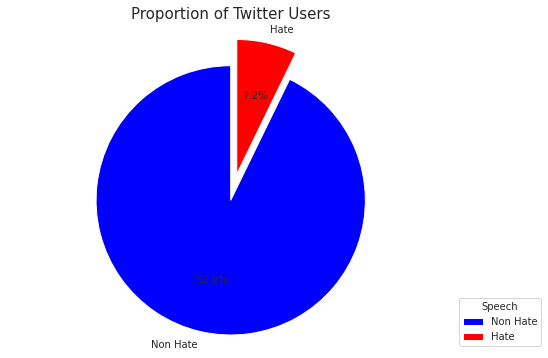

In [14]:
size=data.label.value_counts()
labels='Non Hate', 'Hate'
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(size, explode=(0, 0.2), labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
ax.axis('equal')
plt.title('Proportion of Twitter Users', size=15)
ax.legend(labels, bbox_to_anchor=(1, 0), loc='lower left', title='Speech')
plt.show()

It is given that 7.2% of twitter users might Hate. So the baseline model could be to predict that 7.2% of the users will Hate. Given 7.2% is a small number, we need to ensure that the chosen model does predict with great accuracy this 7.2% as it is of interest to the company to identify these users as opposed to accurately predicting the users that are non haters.

In [15]:
def preprocess_text(text):
    
    """Function to clean text from irrelevant words and symbols"""
    
    if type(text) == float:
        print('Entry not valid')
        return ""
    sentence = []

    # Tokenize and lowercase all alphabet
    tokens = [contractions.fix(i.lower()) for i in word_tokenize(str(text))]
    
    # Part of speech
    tags = pos_tag(tokens)
    
    for (token, tag) in tags:
        # Remove all irrelevant symbols from token
        token = re.sub(r"([0-9]+|[-_@./&+]+|``)", '', token)
        token = re.sub(r"(@[A-Za-z0-9_]+)|[^\w\s]|#|http\S+", '', token)
        token = token.encode("ascii", "ignore")
        token = token.decode()
        
        # Grab the positions of the nouns(NN), verbs(VB), adverb(RB), and adjective(JJ)
        if tag.startswith('NN'):
            position = 'n'
        elif tag.startswith('VB'):
            position = 'v'
        elif tag.startswith('RB'):
            position = 'r'
        else:
            position = 'a'

        lemmatized_word = lemmatizer.lemmatize(token, position)
        if lemmatized_word not in stopwords_punctuation:
            sentence.append(lemmatized_word)
    final_sent = ' '.join(sentence)
    final_sent = final_sent.replace("n't", 'not').replace('ii', '').replace('iii', '')
    final_sent = final_sent.replace("'s", "").replace("''", "").replace("nt", "not")
    return final_sent

data_cleaned = data.copy()
data_cleaned['cleaned_text'] = data_cleaned.text.apply(preprocess_text)
print(f'The longest for tweet is: {max(data_cleaned.cleaned_text.str.len())}')
print(f'The shortest for tweet is: {min(data_cleaned.cleaned_text.str.len())}')

The longest for tweet is: 521
The shortest for tweet is: 0


# Visualize the frequency of Words

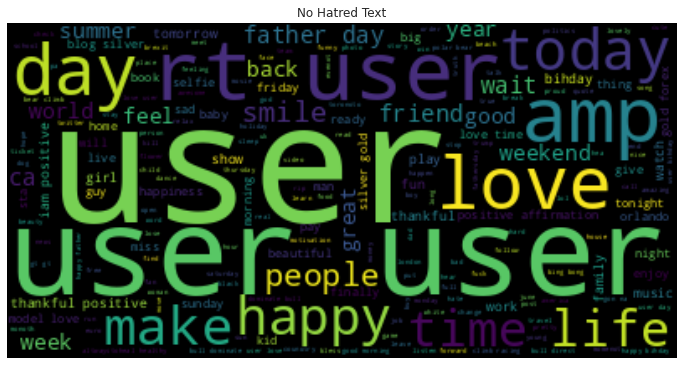

In [16]:
# Let's split the dataset into non hate(0) and hate(1) so as to visualize the frequency of the words
no_hate = data_cleaned[data_cleaned['label']==0]
hate = data_cleaned[data['label']==1]

wordcloud = WordCloud(background_color='black').generate(' '.join(no_hate.cleaned_text))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('No Hatred Text')
plt.axis('off')
plt.show()

**Above, we can see that those are `non-hate` statements**

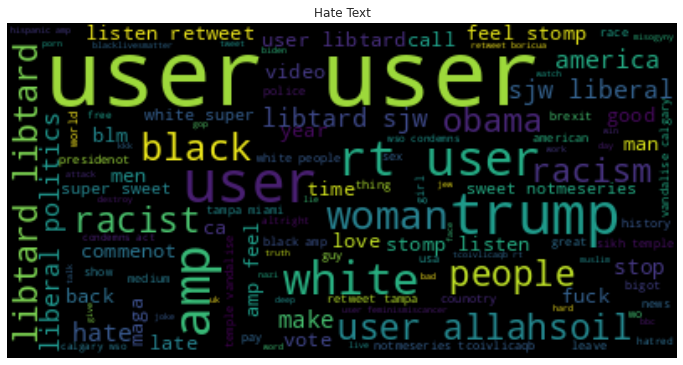

In [17]:
wordcloud = WordCloud(background_color='black').generate(' '.join(hate.cleaned_text))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Hate Text')
plt.axis('off')
plt.show()

**While these are `hate` statements**

# Feature Engineering

## Frequency distribution of Part of Speech Tags

In [18]:
%%time 
pos_group = {
    'noun':['NN','NNS','NNP','NNPS'],
    'pron':['PRP','PRP$','WP','WP$'],
    'verb':['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj':['JJ','JJR','JJS'],
    'adv':['RB','RBR','RBS','WRB']
}

        
def count_pos_tag(text, flags):
    
    """Function to check and count the respective parts of speech tags"""
    
    count=0
    tokens = [contractions.fix(i.lower()) for i in word_tokenize(text)]
    tags = pos_tag(tokens)

    for (token, tag) in tags:
        token = re.sub(r"([0-9]+|[-_@./&+]+|``)", '', token)
        token = re.sub(r"(@[A-Za-z0-9_]+)|[^\w\s]|#|http\S+", '', token)
        token = token.encode("ascii", "ignore")
        token = token.decode()
        if tag in pos_group[flags]:
            count+=1
    return count

data_cleaned['noun_count'] = data_cleaned.text.apply(lambda x: count_pos_tag(x, 'noun'))
data_cleaned['verb_count'] = data_cleaned.text.apply(lambda x: count_pos_tag(x, 'verb'))
data_cleaned['adj_count'] = data_cleaned.text.apply(lambda x: count_pos_tag(x, 'adj'))
data_cleaned['adv_count'] = data_cleaned.text.apply(lambda x: count_pos_tag(x, 'adv'))
data_cleaned['pron_count'] = data_cleaned.text.apply(lambda x: count_pos_tag(x, 'pron'))

CPU times: user 3min 40s, sys: 1.53 s, total: 3min 41s
Wall time: 3min 42s


In [19]:
data_cleaned['char_count'] = data_cleaned.text.apply(len)
data_cleaned['word_count'] = data_cleaned.text.apply(lambda x: len(x.split()))
data_cleaned['uniq_word_count'] = data_cleaned.text.apply(lambda x: len(set(x.split())))
data_cleaned['htag_count'] = data_cleaned.text.apply(lambda x: len(re.findall(r'(#w[A-Za-z0-9]*)', x)))
data_cleaned['stopword_count'] = data_cleaned.text.apply(lambda x: len([wrd for wrd in word_tokenize(x) if wrd in stopwords]))
data_cleaned['sent_count'] = data_cleaned.text.apply(lambda x: len(sent_tokenize(x)))
data_cleaned['avg_word_len'] = data_cleaned['char_count']/(data_cleaned['word_count']+1)
data_cleaned['avg_sent_len'] = data_cleaned['word_count']/(data_cleaned['sent_count']+1)
data_cleaned['uniq_vs_words'] = data_cleaned.uniq_word_count/data_cleaned.word_count # Ratio of unique words to the total number of words
data_cleaned['stopwords_vs_words'] = data_cleaned.stopword_count/data_cleaned.word_count
data_cleaned['title_word_count'] = data_cleaned.text.apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
data_cleaned['uppercase_count'] = data_cleaned.text.apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

# Get train labels from the training sets
dataLabel = data_cleaned.label
data_cleaned.drop(['label','id','text'], axis=1, inplace=True)

## Encoding Text

In [20]:
# We will encode text data using TF-IDF
tfVectorizer.fit(data_cleaned.cleaned_text)
tfidf_feats = tfVectorizer.transform(data_cleaned.cleaned_text).toarray()
tfidf = pd.DataFrame(tfidf_feats, columns=tfVectorizer.get_feature_names())
# Join both DataFrames
data_cleaned = tfidf.merge(data_cleaned, left_index=True, right_index=True)
data_cleaned = data_cleaned.drop(['cleaned_text'], axis=1)

# Check for Missing Values

In [21]:
print(data_cleaned.isnull().sum().sort_values(ascending=False))

accept             0
quote              0
problem            0
product            0
project            0
                  ..
garden             0
gay                0
gbp                0
germany            0
uppercase_count    0
Length: 817, dtype: int64


# Scale & Split the Dataset

In [22]:
scaler = StandardScaler()
scaler.fit(data_cleaned)
scaled = scaler.transform(data_cleaned)

X_train, X_test, y_train, y_test = train_test_split(scaled, dataLabel, stratify = dataLabel, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(28608, 817) (7152, 817) (28608,) (7152,)


# Model Building & Evaluation

## Logistic Regression & Parameter tuning

In [23]:
def confusion_matrix_plot(cm, normalized= True, cmap= 'bone'):
    norm_cm = cm
    if normalized:
        plt.figure(figsize=(6,4))
        norm_cm = (cm.astype('float')/ cm.sum(axis= 1)[:, np.newaxis])
        return sns.heatmap(norm_cm, annot= cm, fmt='g', 
                           xticklabels= ['Predicted: No Hate', 'Predicted: Yes Hate'], yticklabels=['Actual: No Hate', 'Actual: Yes Hate'])

for c in [0.0001, 0.001, 0.01, 0.1, 1, 10]:
    logReg = LogisticRegression(solver='liblinear', C=c)
    logReg.fit(X_train, y_train)
    pred = logReg.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, pred)
    print(f"{c}->{auc:.4f}")

0.0001->0.9043
0.001->0.9077
0.01->0.9110
0.1->0.9106
1->0.9069
10->0.9035


In [ ]:
for m in [0.01, 0.1, 1]:
    print(f"Inverse of regularization strength {m}")
    
    for tol in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
        logReg = LogisticRegression(solver='liblinear', C=m, tol=tol)
        logReg.fit(X_train, y_train)
        pred = logReg.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, pred)
        print(f"{tol}->{auc:.4f}")
    print()

Inverse of regularization strength 0.01
1e-05->0.9110
0.0001->0.9110
0.001->0.9110
0.01->0.9110
0.1->0.9105
1->0.9083
10->0.8964

Inverse of regularization strength 0.1
1e-05->0.9106
0.0001->0.9106
0.001->0.9106
0.01->0.9106
0.1->0.9105
1->0.9086
10->0.8962

Inverse of regularization strength 1
1e-05->0.9069


In [ ]:
for maxIt in [1, 5, 10, 15, 20]:
    logReg = LogisticRegression(solver='liblinear', C=0.01, tol=1e-05, max_iter=maxIt)
    logReg.fit(X_train, y_train)
    pred = logReg.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, pred)
    print(f"{maxIt}->{auc:.4f}")

In [ ]:
for mClass in ["auto", "ovr"]:
    logReg = LogisticRegression(solver='liblinear', C=0.01, tol=1e-05, max_iter=5, multi_class=mClass)
    logReg.fit(X_train, y_train)
    pred = logReg.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, pred)
    print(f"{mClass}->{auc:.4f}")

In [ ]:
logReg = LogisticRegression(solver='liblinear',
                            C=0.01, tol=1e-05, max_iter=5, 
                            multi_class='auto')

logReg.fit(X_train, y_train)
pred = logReg.predict_proba(X_test)[:, 1]
y_pred = logReg.predict(X_test)
print(f"ROC AUC Logistic Regression Score: {roc_auc_score(y_test, pred):.4f}")
cm = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(cm)
plt.show()

In [ ]:
plt.figure(figsize=(14, 8))
fpr, tpr, _ = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)
plt.plot(fpr, tpr, label= f"Validation AUC-ROC={str(auc)}")
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

The orange line seen here represents the random selection. What it says is that if i get 50% of the False Positives in my random selection, I also get 50% of the True Positives or True Users that will hate.

## Random Forest & Parameter tuning

In [ ]:
for n in [150, 200, 250, 300, 350]:
    rFc = RandomForestClassifier(n_estimators=n, random_state=42)
    rFc.fit(X_train, y_train)
    pred = rFc.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, pred)
    print(f"{n}->{auc:.4f}")

In [ ]:
del m
del tol
for m in [200, 250, 300]:
    print(f"Number of estimators {m}")
    
    for c in ["gini", "entropy"]:
        rFc = RandomForestClassifier(n_estimators=m, criterion=c, random_state=42)
        rFc.fit(X_train, y_train)
        pred = rFc.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, pred)
        print(f"{c}->{auc:.4f}")
    print()

In [ ]:
for depth in [5, 10, 15, None]:
    rFc = RandomForestClassifier(n_estimators=300, criterion='entropy', max_depth=depth, random_state=42)
    rFc.fit(X_train, y_train)
    pred = rFc.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, pred)
    print(f"{depth}->{auc:.4f}")

In [32]:
for samp in [0.01, 0.1, 0.5, 2]:
    rFc = RandomForestClassifier(
        n_estimators=300,
        criterion='entropy', 
        max_depth=None, 
        min_samples_split=samp,
        random_state=42
    )
    
    rFc.fit(X_train, y_train)
    pred = rFc.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, pred)
    print(f"{samp}->{auc:.4f}")

0.01->0.9213
0.1->0.9027
0.5->0.8635
2->0.9286


In [33]:
for leaf in [0.01, 0.1, 0.5, 2]:
    rFc = RandomForestClassifier(
        n_estimators=200,
        criterion='entropy', 
        max_depth=None, 
        min_samples_split=2, 
        min_samples_leaf=leaf,
        random_state=42
    )
    
    rFc.fit(X_train, y_train)
    pred = rFc.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, pred)
    print(f"{leaf}->{auc:.4f}")

0.01->0.9485
0.1->0.7829
0.5->0.5000
2->0.9609


ROC AUC Random Forest Classifier Score: 0.9639
'%' of Misclassified class: 5.131578947368421


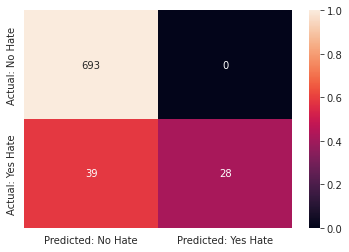

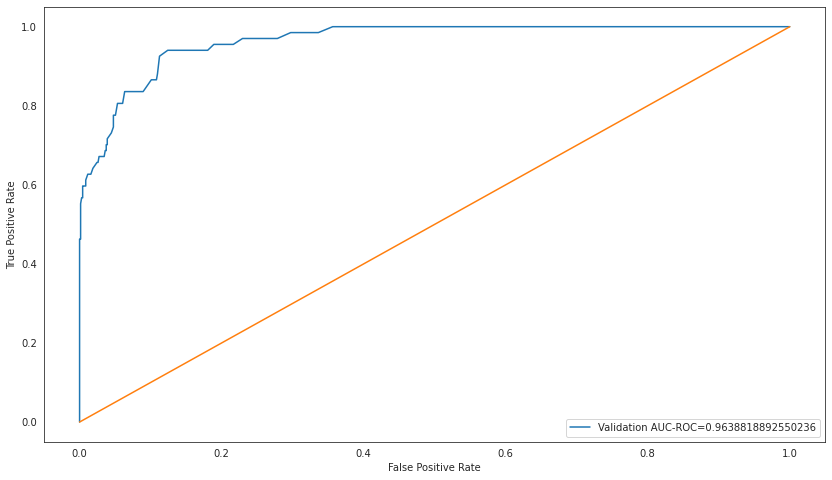

,label,Predicted_class
3235,0,0
706,0,0
2362,0,0
2372,0,0
1976,0,0
2730,0,0
2553,0,0
3763,0,0
840,0,0
1277,0,0


In [97]:
rFc = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, 
                             min_samples_split=2, random_state=42)
rFc.fit(X_train, y_train)
pred = rFc.predict_proba(X_test)[:, 1]
y_pred = rFc.predict(X_test)
auc = roc_auc_score(y_test, pred)
print(f"ROC AUC Random Forest Classifier Score: {auc:.4f}")
print("'%' of Misclassified class:", np.mean(y_pred != y_test)*100)
cm = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(cm)
plt.show()

plt.figure(figsize=(14, 8))
fpr, tpr, _ = roc_curve(y_test, pred)
plt.plot(fpr, tpr, label= f"Validation AUC-ROC={str(auc)}")
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# compare the actual class and predicted class
out = pd.DataFrame(y_test[0:30])
out['Predicted_class'] = y_pred[0:30]
out

In [36]:
cols_todisplay = 80
importance_feat = rFc.feature_importances_
sorted_idx = np.argsort(importance_feat)[::-1]

print('These are the most importance Features\n')
for i in range(X_train.shape[1]):
    print(f"{i + 1,cols_todisplay} {data_cleaned.columns[sorted_idx[i]]} ----> {importance_feat[sorted_idx[i]]:.12f}\n")

These are the most importance Features

(1, 80) trump ----> 0.066537929694

(2, 80) user ----> 0.041190071252

(3, 80) white ----> 0.030214544265

(4, 80) uniq_vs_words ----> 0.030213999704

(5, 80) avg_word_len ----> 0.029843428182

(6, 80) char_count ----> 0.024510021623

(7, 80) noun_count ----> 0.024399211027

(8, 80) title_word_count ----> 0.023868890104

(9, 80) word_count ----> 0.023538510147

(10, 80) stopwords_vs_words ----> 0.022964146025

(11, 80) uniq_word_count ----> 0.021953614023

(12, 80) avg_sent_len ----> 0.020027625807

(13, 80) stopword_count ----> 0.018555066222

(14, 80) adj_count ----> 0.018435755928

(15, 80) verb_count ----> 0.017519861500

(16, 80) rt ----> 0.015686066378

(17, 80) uppercase_count ----> 0.013842034465

(18, 80) tcoivlicaqb ----> 0.012519652271

(19, 80) super ----> 0.012277032722

(20, 80) sweet ----> 0.011643001780

(21, 80) adv_count ----> 0.011441507752

(22, 80) notmeseries ----> 0.010999284985

(23, 80) corruption ----> 0.010010902877

(2

In [37]:
rFc_best_feats = data_cleaned[data_cleaned.columns[sorted_idx[:80]]]
rFc_best_feats.head()

,trump,user,white,uniq_vs_words,avg_word_len,char_count,noun_count,title_word_count,word_count,stopwords_vs_words,uniq_word_count,avg_sent_len,stopword_count,adj_count,verb_count,rt,uppercase_count,tcoivlicaqb,super,sweet,adv_count,notmeseries,corruption,racist,pron_count,racism,sent_count,not,america,horny,american,fuck,republican,music,deep,leave,stop,people,sex,gop,wo,politics,htag_count,presidenot,call,amp,toronoto,commenot,brexit,domestic,real,latina,video,agree,pussy,flash,maga,borisjohnson,year,blm,porn,late,black,step,biden,news,but,destroy,donaldtrump,joke,man,loveisland,no,counotry,finger,anal,freak,hot,cream,thick
0,0.0,0.0,0.0,1.00000,7.523810,158,7,5,20,0.350000,20,5.000000,7,4,3,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.00000,9.500000,152,8,1,15,0.000000,15,7.500000,0,5,1,0.0,0,0.0,0.0,0.0,2,0.0,0.0,0.0,0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.00000,5.111111,92,4,2,17,0.352941,17,5.666667,6,2,6,0.0,1,0.0,0.0,0.0,3,0.0,0.0,0.0,2,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.74359,5.025000,201,13,0,39,0.487179,29,9.750000,19,2,8,0.0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,3,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.00000,8.214286,115,5,2,13,0.461538,13,6.500000,6,2,2,0.0,0,0.0,0.0,0.0,3,0.0,0.0,0.0,0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


ROC AUC Random Forest Classifier Score after Feature Selection: 0.9679


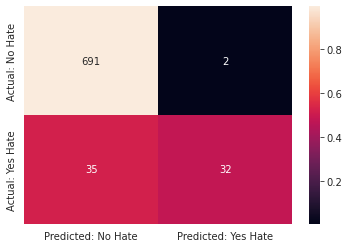

In [38]:
rFc_scaler = StandardScaler()
rFc_scaler.fit(rFc_best_feats)
rFc_scaled = rFc_scaler.transform(rFc_best_feats)

X_train_rFc, X_test_rFc, y_train_rFc, y_test_rFc = train_test_split(rFc_scaled, dataLabel, stratify = dataLabel, test_size = 0.2, random_state = 42)

rFc = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=2)

rFc.fit(X_train_rFc, y_train_rFc)
pred = rFc.predict_proba(X_test_rFc)[:, 1]
y_pred = rFc.predict(X_test_rFc)
print(f"ROC AUC Random Forest Classifier Score after Feature Selection: {roc_auc_score(y_test_rFc, pred):.4f}")
cm = confusion_matrix(y_test_rFc, y_pred)
confusion_matrix_plot(cm)
plt.show()

**The Random Forest Model out performed the previous model after Feature Selection**

## Decision Tree & Parameter tuning

In [39]:
del depth
for depth in [5, 10, 15, 20, 25]:
    dTc = DecisionTreeClassifier(random_state=42, max_depth=depth)
    dTc.fit(X_train, y_train)
    pred = dTc.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, pred)
    print(f"{depth}->{auc:.4f}")

5->0.8418
10->0.7731
15->0.6996
20->0.6135
25->0.5795


In [40]:
del m
del c
for m in [5, 10, 15]:
    print(f"Maximum Depth {m}")
    
    for c in ["gini", "entropy"]:
        dTc = DecisionTreeClassifier(random_state=42, max_depth=m, criterion=c)
        dTc.fit(X_train, y_train)
        pred = dTc.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, pred)
        print(f"{c}->{auc:.4f}")
    print()

Maximum Depth 5
gini->0.8418
entropy->0.9034

Maximum Depth 10
gini->0.7731
entropy->0.7212

Maximum Depth 15
gini->0.6996
entropy->0.7967



In [41]:
for samp in [0.01, 0.1, 0.5, 2]:
    dTc = DecisionTreeClassifier(random_state=42, max_depth=5, criterion='entropy', 
                                 min_samples_split=samp)
    
    dTc.fit(X_train, y_train)
    pred = dTc.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, pred)
    print(f"{samp}->{auc:.4f}")

0.01->0.9148
0.1->0.8932
0.5->0.8833
2->0.9034


ROC AUC Decision Tree Classifier Score: 0.9148


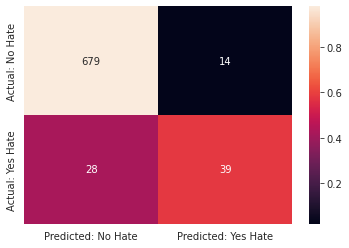

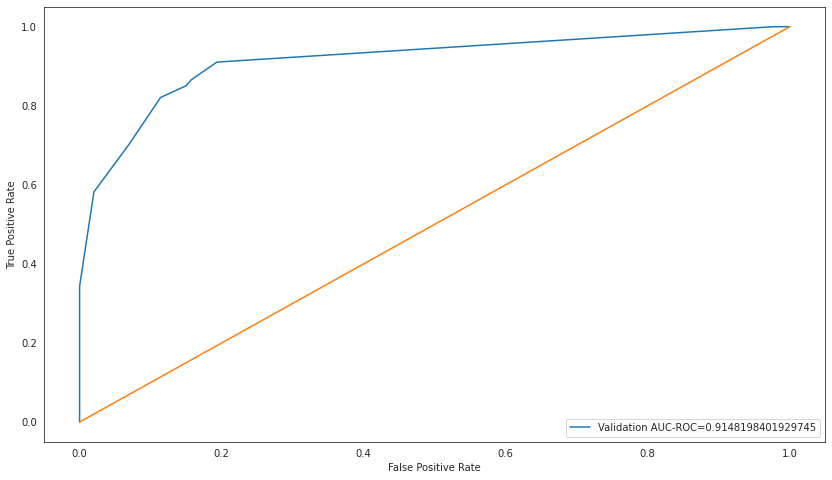

In [42]:
dTc = DecisionTreeClassifier(random_state=42, max_depth=5, criterion='entropy', 
                             min_samples_split=0.01)

dTc.fit(X_train, y_train)
pred = dTc.predict_proba(X_test)[:, 1]
y_pred = dTc.predict(X_test)
auc = roc_auc_score(y_test, pred)
print(f"ROC AUC Decision Tree Classifier Score: {auc:.4f}")
cm = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(cm)
plt.show()

plt.figure(figsize=(14, 8))
fpr, tpr, _ = roc_curve(y_test, pred)
plt.plot(fpr, tpr, label= f"Validation AUC-ROC={str(auc)}")
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

## XGBoost & Parameter tuning

In [43]:
for n in [50, 100, 250, 300]:
    xgb_model = XGBClassifier(n_estimators=n, eval_metric="auc", 
                              objective='binary:logistic')
    
    xgb_model.fit(X_train, y_train)
    pred = xgb_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, pred)
    print(f"{n}->{auc:.4f}")

50->0.9595
100->0.9542
250->0.9453
300->0.9436


In [44]:
for lr in [0.1, 1, 1.5]:
    xgb_model = XGBClassifier(n_estimators=50, eval_metric="auc", 
                              objective='binary:logistic', learning_rate=lr)
    
    xgb_model.fit(X_train, y_train)
    pred = xgb_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, pred)
    print(f"{lr}->{auc:.4f}")

0.1->0.9584
1->0.9357
1.5->0.9179


ROC AUC XGBoost Classifier Score: 0.9595


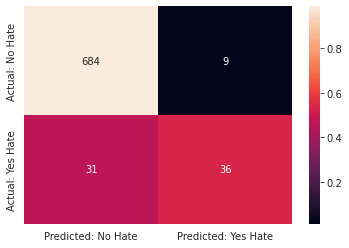

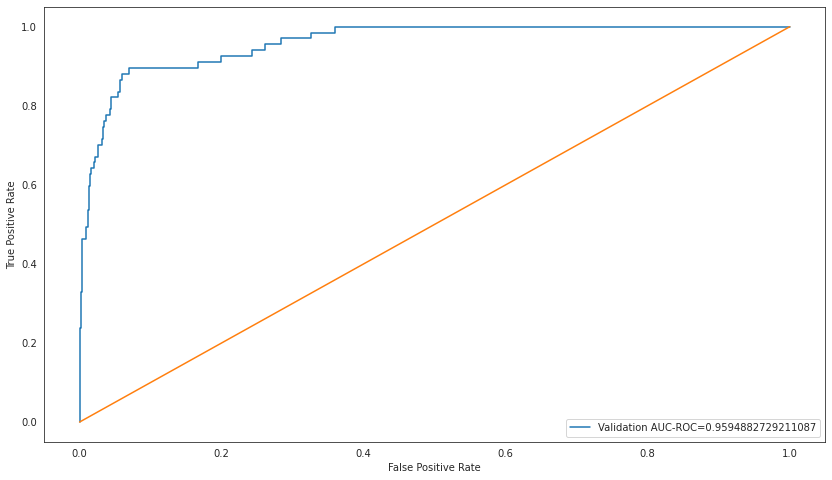

,label,Predicted_class
3235,0,0
706,0,0
2362,0,0
2372,0,0
1976,0,0
2730,0,0
2553,0,0
3763,0,0
840,0,0
1277,0,0


In [45]:
xgb_model = XGBClassifier(n_estimators=50, eval_metric="auc", 
                          objective='binary:logistic')

xgb_model.fit(X_train, y_train)
pred = xgb_model.predict_proba(X_test)[:, 1]
y_pred = xgb_model.predict(X_test)
auc = roc_auc_score(y_test, pred)
print(f"ROC AUC XGBoost Classifier Score: {auc:.4f}")
cm = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(cm)
plt.show()

plt.figure(figsize=(14, 8))
fpr, tpr, _ = roc_curve(y_test, pred)
plt.plot(fpr, tpr, label= f"Validation AUC-ROC={str(auc)}")
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

The XGBoost model has the best performance. We will use cross validation to prevent overfitting and check so we know the actual scores of individual model.

# Model Evaluation with Cross Validation

In [47]:
def cross_validation_score(ml_model, thres = 0.5, random_st=42, cols = data_cleaned.columns):
    
    """
    Function to calculate the k fold cross validation stratified on the basis of target
    and prints the ROC, Recall and Precision Scores.
    
    Args:
        ml_model (numpy array) : ml_model for predictions
        thres (float) : threshold for the probabilities of the model predictions
        random_st (int) : random_st is the random state for Kfold
        cols (string) : cols are the column names
    
    Returns:
        cv_scores (float) : cross validation scores
    """
    
    i= 1
    x1 = data_cleaned.copy()
    x1 = data_cleaned[cols]
    cv_scores = []
    
    sKf = StratifiedKFold(n_splits= 5, shuffle= True, random_state= random_st)
    
    for train_index, test_index in sKf.split(x1, y):
        print(f"\n{i} of KFold {sKf.n_splits}")
        xtrain, xval = x1.iloc[train_index], x1.iloc[test_index]
        ytrain, yval = y.iloc[train_index], y.iloc[test_index]
        
        model = ml_model
        model.fit(xtrain, ytrain)
        y_pred = model.predict(xval)
        pred_probs = model.predict_proba(xval)
        pp = []
        
        # Use threshold to define the classes based on probability values
        for j in pred_probs[:,1]:
            if j > thres:
                pp.append(1)
            else:
                pp.append(0)
        # Calculate scores for each fold
        pred_val = pp
        roc_score = roc_auc_score(yval, pred_probs[:,1])
        recall = recall_score(yval, pred_val)
        precision = precision_score(yval, pred_val)
        msg = ""
        msg += f"ROC AUC Score: {roc_score:.4f}, Recall Score: {recall:.4f}, Precision Score: {precision:.4f}"
        print(f"{msg}")
        cv_scores.append(roc_score)
        i+=1
        
    return cv_scores

## Logistic Regression

In [48]:
y=dataLabel
log_cv_score = cross_validation_score(LogisticRegression(solver='liblinear',
                                                         C=0.0001, tol=1, max_iter=1, 
                                                         multi_class='auto')
                                     )


1 of KFold 5
ROC AUC Score: 0.4827, Recall Score: 0.0000, Precision Score: 0.0000

2 of KFold 5
ROC AUC Score: 0.5056, Recall Score: 0.0000, Precision Score: 0.0000

3 of KFold 5
ROC AUC Score: 0.5663, Recall Score: 0.0000, Precision Score: 0.0000

4 of KFold 5
ROC AUC Score: 0.4288, Recall Score: 0.0000, Precision Score: 0.0000

5 of KFold 5
ROC AUC Score: 0.4866, Recall Score: 0.0000, Precision Score: 0.0000


## RandomForestClassifier

In [49]:
rf_cv_score = cross_validation_score(RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, 
                                                            min_samples_split=2, random_state=42)
                                    )


1 of KFold 5
ROC AUC Score: 0.9641, Recall Score: 0.3433, Precision Score: 0.8846

2 of KFold 5
ROC AUC Score: 0.9685, Recall Score: 0.4706, Precision Score: 0.9412

3 of KFold 5
ROC AUC Score: 0.9487, Recall Score: 0.3382, Precision Score: 1.0000

4 of KFold 5
ROC AUC Score: 0.9622, Recall Score: 0.3731, Precision Score: 1.0000

5 of KFold 5
ROC AUC Score: 0.9623, Recall Score: 0.4776, Precision Score: 0.9697


## DecisionTreeClassifier

In [50]:
dt_cv_score = cross_validation_score(DecisionTreeClassifier(random_state=42, max_depth=5, criterion='entropy', 
                                                            min_samples_split=0.01)
                                    )


1 of KFold 5
ROC AUC Score: 0.8969, Recall Score: 0.5522, Precision Score: 0.6271

2 of KFold 5
ROC AUC Score: 0.9453, Recall Score: 0.5441, Precision Score: 0.8810

3 of KFold 5
ROC AUC Score: 0.8781, Recall Score: 0.5882, Precision Score: 0.7273

4 of KFold 5
ROC AUC Score: 0.8619, Recall Score: 0.3881, Precision Score: 0.7429

5 of KFold 5
ROC AUC Score: 0.8323, Recall Score: 0.6418, Precision Score: 0.5733


## XGBClassifier

In [51]:
xgb_cv_score = cross_validation_score(XGBClassifier(n_estimators=50, eval_metric="auc", 
                                                    objective='binary:logistic')
                                     )


1 of KFold 5
ROC AUC Score: 0.9584, Recall Score: 0.5821, Precision Score: 0.6500

2 of KFold 5
ROC AUC Score: 0.9583, Recall Score: 0.6176, Precision Score: 0.8936

3 of KFold 5
ROC AUC Score: 0.9564, Recall Score: 0.5588, Precision Score: 0.9048

4 of KFold 5
ROC AUC Score: 0.9406, Recall Score: 0.4776, Precision Score: 0.8421

5 of KFold 5
ROC AUC Score: 0.9243, Recall Score: 0.6269, Precision Score: 0.7778


# Comparison of Model Fold wise

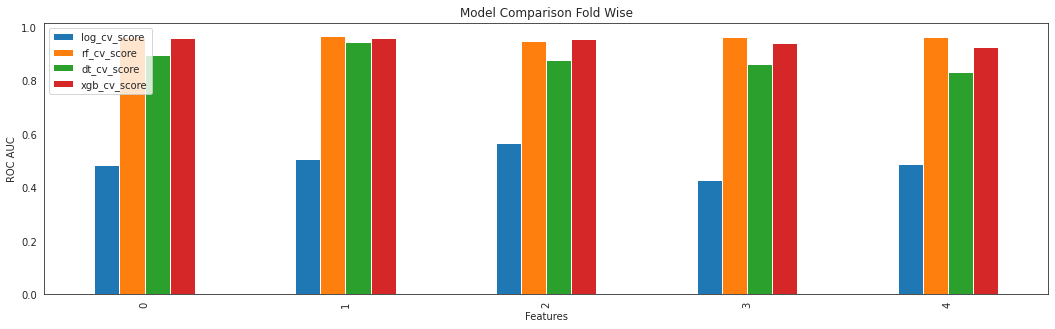

In [54]:
compare_score = pd.DataFrame({'log_cv_score':log_cv_score,
                              'rf_cv_score':rf_cv_score,
                              'dt_cv_score':dt_cv_score,
                              'xgb_cv_score':xgb_cv_score
                             })

compare_score.plot(y = ['log_cv_score','rf_cv_score',
                        'dt_cv_score','xgb_cv_score'], 
                   kind = 'bar')

plt.title('Model Comparison Fold Wise')
plt.xlabel('Features')
plt.ylabel('ROC AUC');

**The `Random Forest Model` has the best performance across 5-fold. Therefore, we will work on improving this model**

In [91]:
rfc_cv_score = cross_validation_score(RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, 
                                                            min_samples_split=2, random_state=42), 
                                      thres=0.11)


1 of KFold 5
ROC AUC Score: 0.9641, Recall Score: 0.9403, Precision Score: 0.4286

2 of KFold 5
ROC AUC Score: 0.9685, Recall Score: 0.8824, Precision Score: 0.4688

3 of KFold 5
ROC AUC Score: 0.9487, Recall Score: 0.8529, Precision Score: 0.4173

4 of KFold 5
ROC AUC Score: 0.9622, Recall Score: 0.8806, Precision Score: 0.4646

5 of KFold 5
ROC AUC Score: 0.9623, Recall Score: 0.9104, Precision Score: 0.4420


# Prediction based on probability

ROC AUC Random Forest Classifier Score: 0.9595
Random Forest Recall Score: 0.9403
Random Forest Precision Score: 0.4228
'%' of Misclassified class: 11.842105263157894


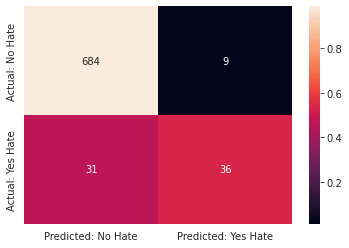

,label,Predicted_class
3235,0,0
706,0,0
2362,0,0
2372,0,0
1976,0,0
2730,0,0
2553,0,0
3763,0,0
840,0,0
1277,0,0


In [95]:
thres = 0.11
prediction = []
model = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, 
                             min_samples_split=2, random_state=42)

model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]

for i in probs:
    if i >= thres:
        prediction.append(1)
    else:
        prediction.append(0)
    
roc_score = roc_auc_score(y_test, probs)
recall = recall_score(y_test, prediction)
precision = precision_score(y_test, prediction)
print(f"ROC AUC Random Forest Classifier Score: {auc:.4f}")
print(f"Random Forest Recall Score: {recall:.4f}")
print(f"Random Forest Precision Score: {precision:.4f}")
print("'%' of Misclassified class:", np.mean(prediction != y_test)*100)
cm = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(cm)
plt.show()

# compare the actual class and predicted class
out = pd.DataFrame(y_test[0:30])
out['Predicted_class'] = prediction[0:30]
out

We can see a little improvement of the random forest model for both class but with a high Misclassified class.

**Ways to improve this model**
1. Add more training data
2. Try Over/Undersampling techniques like SMOTE